# Structural Design Pattern
- Structural Design Patterns are solutions that focus on how classes and objects are organzied to form larger, functional structures. These patterns help developers simplify relationships between objects, making code more efficient, flexible and easy to maintain.
- These patterns focus on organizing and connecting components (or objects) withing a systemm in an efficient resusable, and maintainable way. They don't just create objects; they explain how to assemble objects and classes into larger structures, while keeping these structures flexible and efficient.
- They define the blueprint for how objects and classes should interact and combine to form a cohesive and efficient system.

## Types of Structural Design Patterns
1. Adapater Pattern: The universal Translator
    - Imagine we have a piece of machinery that works on a specific type of power supply, but we're in a country with a different standard. We use an adapter to make it compatible.
    - The Adapter pattern works the same way, it acts as a bridge b/w 2 incompatible interfaces, allowing them to work together without altering their underlying code.
2. Bridge Pattern: Separation of Concerns
    - Picture a suspension bridge. The cables support the bridge deck, but the 2 components are separate and can be changed independently.
    - The Bridge pattern lets us split a large class or a set of closely related classes into 2 separate hierarchies - abstraction and implementation - which can be developed independently of each other.
3. Composite Pattern: Building a Hierarchy
    - Think of a tree. A tree is composed of branches, and each branch can have smaller brancehs or leaves. Despite the complexity, the whole tree is treated as a single unit.
    - The composite pattern lets us treat individual objects and groups of objects uniformly, making it easier to work with complex hierarchies.
4. Decorator Pattern: Customizing on the Fly
    - Imagine decorating a cake. We start with a plain cake and add layers of frosting, sprinkles, and designs, each enchanching the final product without altering the base.
    - The Decorator Pattern allows us to dynamically add new behaviors or responsibilites to objects without modifying their structure by placing these objects inside wrapper objects that contain the behaviors.
5. Facade Pattern: Simplifying complexity
    - Imagine walkingn into a small home. Instead of controlling each device manually, we press a single button to activate the entire system.
    - The Facade Pattern provides a simplified interface to a complex subsystem, making it easier to interact with without dealing with all the underlying details.
6. Flyweight Pattern: Sharing Resources Efficiently
    - Think of a library with hunderds of books. Instead of creating a new shelf for every copy of a book, the library stores a single copy and lends it out to multiple readers.
    - The Flyweight pattern minimizes memory usage by sharing common parts of objects while allowing unique details for each instance.
7. Proxy Pattern: The middleman
    - Imagine hiring a personal assitant to handle our calls, emails, and appointments. The assistnt represents us but doen't require us to interact directly.
  
## What should we care about these patterns?
1. Organized code
2. Reduced dependencies
3. Reusability
4. Simplified maintenance

## Real-life use case
1. Adapeter: Integrating a third party API that has a different data format than our application's internal structure.
2. Bridge: Designing a cross-platform UI framework that separates platfrom-specific implementations from shared abstractions.
3. Composite: Representing a folder structrue in an operating system, where files and folders are treated uniformly.
4. Decorator: Adding features to a text editor, such as spell check or auto-format, without modifying the code editor functionality.
5. Facade: Simplifying access to a complex video player libaray by providing a single play/pause interface.
6. Flyweight: Managing characters in a word processor by sharing fonts and styles across repeated characters.
7. Proxy: Controlling access to a remote database by using proxy class to cache data locally.

## Conclusion
- Structural Design Patterns are the architects for our softare building. They ensure that our components are well-connected, organized, and efficient, making our codebase more robust and maintainable.

# 1. Adapter Design Pattern
- Allows incompatible interfaces to work together by converting the interface of one class into another that the client expects.
- It is useful in
    - We're integrating with a legacy system or a third party library that doesn't match our current interface.
    - We want to reuse exisiting functionality without modifying its source code.
    - We need to bridge the gap between new and old code, or between system built with different iterface designs.
- Solves this by introducing a wrapper class that sits between our system and the incompatible component. It translates calls from our interface into calls the legacy or third party system understands without changing either side.

### Problem: Incompatible Payment Interfacces
- Building the checkout component of an e-commerce application.
- Our checkout service is designed to work with a Payment Interface for handling payments.

In [1]:
import time

class PaymentProcessor:
    def process_payment(self, amount, currency):
        raise NotImplementedError

    def is_payment_successful(self):
        raise NotImplementedError

    def get_transaction_id(self):
        raise NotImplementedError

# This abstraction makes it easy to swap payment providers without changing any code business logic.

class InHousePaymentProcessor(PaymentProcessor):
    def __init__(self):
        self.transaction_id = None
        self.is_payment_successful_flag = False

    def process_payment(self, amount, currency):
        print(f"InHousePaymentProcessor: Processor payment of {amount} {currency}")
        self.transaction_id = f"TXN_{int(time.time() * 1000)}"
        self.is_payment_successful_flag = True
        print(f"InHousePaymentProcessor: Payment successful. Txn ID: {self.transaction_id}")

    def is_payment_successful(self):
        return self.is_payment_successful_flag

    def get_transaction_id(self):
        return self.transaction_id

# Our Checkout Service uses this interface and wrks beautifully with the in-house payment processor
class CheckoutService:
    def __init__(self, payment_processor):
        self.payment_processor = payment_processor

    def checkout(self, amount, currency):
        print(f"CheckoutSErvice: Attempting to process order for ${amount} {currency}")
        self.payment_processor.process_payment(amount, currency)
        if self.payment_processor.is_payment_successful():
            print(f"CheckoutService: Order successful! Transaction ID: {self.payment_processor.get_transaction_id()}")
        else:
            print("CheckoutService: Order failed. Payment was not successful.")

# Here's how it gets called from the main e-commerce application
class ECommerceAppV1:
    @staticmethod
    def main():
        processor = InHousePaymentProcessor()
        checkout = CheckoutService(processor)
        checkout.checkout(199.99, "USD")

if __name__ == "__main__":
   ECommerceAppV1.main()

CheckoutSErvice: Attempting to process order for $199.99 USD
InHousePaymentProcessor: Processor payment of 199.99 USD
InHousePaymentProcessor: Payment successful. Txn ID: TXN_1763008454102
CheckoutService: Order successful! Transaction ID: TXN_1763008454102


In [2]:
# Now, integrate with a legacy third-party payment provider, widely used and battle-tested, but with different interface.

class LegacyGateway:
   def __init__(self):
       self.transaction_reference = None
       self.is_payment_successful_flag = False

   def execute_transaction(self, total_amount, currency):
       print(f"LegacyGateway: Executing transaction for {currency} {total_amount}")
       self.transaction_reference = time.time_ns()
       self.is_payment_successful_flag = True
       print(f"LegacyGateway: Transaction executed successfully. Txn ID: {self.transaction_reference}")

   def check_status(self, transaction_reference):
       print(f"LegacyGateway: Checking status for ref: {transaction_reference}")
       return self.is_payment_successful_flag

   def get_reference_number(self):
       return self.transaction_reference

- we now have 2 incompatiblel interfaces. Our exisiting CheckoutService expects a PaymentProcessor. But LegacyGateway does not implement it and it;s method and signatures don't match.
- What we need is a translator -  a class that sits between checkoutServcie and LegacyGateway, adapting the incompatible interface into one that works with our system.

### Adapter Pattern
- Adapter acts as a bridge between an incompatible interface and what the client actually expects.
- Our applicaton expects one interface (PaymentProcessor), but the legacy system provides another (LegacyGateway). The adapter allows the two to work together without altering either side.
- Types of adapters
    1. Object Adapter
        - Uses composition: the adapter holds a reference to the adaptee
        - Allows flexibility and reuse across class hierarchies.
    2. Class Adapter
        - Uses inheritance: the adapter inherits from both the target interface and the adaptee.
        - Requires multiple inheritance, which java doesn't support for classes
- 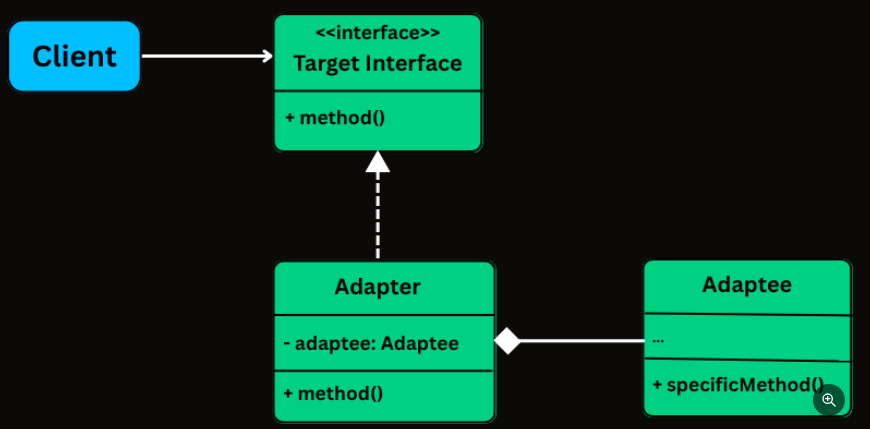

- Example: Real-world
- Charger: Our application (CheckoutService)
- Wall socket: Third party (LegacyGateway)
- Travel plug adapter: Adapter class (LegacyGatewayAdapter)

### Adapter

In [3]:
class PaymentProcessor:
    def process_payment(self, amount, currency):
        raise NotImplementedError

    def is_payment_successful(self):
        raise NotImplementedError

    def get_transaction_id(self):
        raise NotImplementedError

# This abstraction makes it easy to swap payment providers without changing any code business logic.
class InHousePaymentProcessor(PaymentProcessor):
    def __init__(self):
        self.transaction_id = None
        self.is_payment_successful_flag = False

    def process_payment(self, amount, currency):
        print(f"InHousePaymentProcessor: Processor payment of {amount} {currency}")
        self.transaction_id = f"TXN_{int(time.time() * 1000)}"
        self.is_payment_successful_flag = True
        print(f"InHousePaymentProcessor: Payment successful. Txn ID: {self.transaction_id}")

    def is_payment_successful(self):
        return self.is_payment_successful_flag

    def get_transaction_id(self):
        return self.transaction_id

# Our Checkout Service uses this interface and wrks beautifully with the in-house payment processor
class CheckoutService:
    def __init__(self, payment_processor):
        self.payment_processor = payment_processor

    def checkout(self, amount, currency):
        print(f"CheckoutSErvice: Attempting to process order for ${amount} {currency}")
        self.payment_processor.process_payment(amount, currency)
        if self.payment_processor.is_payment_successful():
            print(f"CheckoutService: Order successful! Transaction ID: {self.payment_processor.get_transaction_id()}")
        else:
            print("CheckoutService: Order failed. Payment was not successful.")


# Now, integrate with a legacy third-party payment provider, widely used and battle-tested, but with different interface.
class LegacyGateway:
   def __init__(self):
       self.transaction_reference = None
       self.is_payment_successful_flag = False

   def execute_transaction(self, total_amount, currency):
       print(f"LegacyGateway: Executing transaction for {currency} {total_amount}")
       self.transaction_reference = time.time_ns()
       self.is_payment_successful_flag = True
       print(f"LegacyGateway: Transaction executed successfully. Txn ID: {self.transaction_reference}")

   def check_status(self, transaction_reference):
       print(f"LegacyGateway: Checking status for ref: {transaction_reference}")
       return self.is_payment_successful_flag

   def get_reference_number(self):
       return self.transaction_reference

# Adapter
class LegacyGatewayAdapter(PaymentProcessor):
    def __init__(self, legacy_gateway):
        self.legacy_gateway = legacy_gateway
        self.current_ref = None

    def process_payment(self, amount, currency):
        print(f"Adapter: Translating processPayment() for {amount} {currency}")
        self.legacy_gateway.execute_transaction(amount, currency)
        self.current_ref = self.legacy_gateway.get_reference_number()

    def is_payment_successful(self):
        return self.legacy_gateway.check_status(self.current_ref)

    def get_transaction_id(self):
        return f"LEGACY_TXN_{self.current_ref}"

# Client Code
class ECommerceAppV2:
    @staticmethod
    def main():
        # Modern processor
        processor = InHousePaymentProcessor()
        modern_checkout = CheckoutService(processor)
        print("----Using Modern Processor-----")
        modern_checkout.checkout(199.99, "USD")

        # Legacy gateway through adapter
        print("\n--- Using Legacy Gateway via Adapter ---")
        legacy = LegacyGateway()
        processor = LegacyGatewayAdapter(legacy)
        legacy_checkout = CheckoutService(processor)
        legacy_checkout.checkout(75.50, "EURO")

if __name__ == "__main__":
   ECommerceAppV2.main()

----Using Modern Processor-----
CheckoutSErvice: Attempting to process order for $199.99 USD
InHousePaymentProcessor: Processor payment of 199.99 USD
InHousePaymentProcessor: Payment successful. Txn ID: TXN_1763008454262
CheckoutService: Order successful! Transaction ID: TXN_1763008454262

--- Using Legacy Gateway via Adapter ---
CheckoutSErvice: Attempting to process order for $75.5 EURO
Adapter: Translating processPayment() for 75.5 EURO
LegacyGateway: Executing transaction for EURO 75.5
LegacyGateway: Transaction executed successfully. Txn ID: 1763008454262450000
LegacyGateway: Checking status for ref: 1763008454262450000
CheckoutService: Order successful! Transaction ID: LEGACY_TXN_1763008454262450000


## Problem Statement: Connecting the unconnectable
- Imagine we're designing a smart home system. Our goal is to create a centralized app that controls various devices such as air conditioners, smart lights, cofee machines, and security cameras.
- Each device comes from a different manufacturer, and they all communicate differently:
    - Air conditioners use blurtooth for communication.
    - Smart lights operate over Wi-Fi
    - Coffee machines use Zigbee
    - Security cameras rely on their own custom API
- Now, our app needs to seamlessly control all these devices, regardless of the communication protocol.
- Problem: Each device uses a unique communication protocol, and our app would become a mess if we hard-code the logic for each device. It will be difficult to maintain and extend as more devices are added.
- Challenge: How we create a clean, scalable solution to connect all these devices?

### Solving it Traditional way:

In [3]:
class SmartHomeController:
    def controlDevice(self, deviceType: str):
        if deviceType == 'AirConditioner':
            print("Connecting to Air conditioner via Bluetooth...")
        elif deviceType == 'SmartLight':
            print("Connecting to SmartLight via Wi-Fi...")
        elif deviceType == 'CoffeeMachine':
            print("Connecting to CoffeeMachine via Xigbee...")
        else:
            print("Device type not supported!")


if __name__ == '__main__':
    controller = SmartHomeController()
    print("Welcome to the Smart Home controller!")
    print("Available devices: AirConditioner, SmartLight, CoffeeMachine")

    while True:
        deviceType = input("nEnter the device we want to control or type 'exit' to quit")
        if deviceType == 'exit':
            print("Exiting the Smart Home controller. Goodbye!")
            break

        controller.controlDevice(deviceType)



Welcome to the Smart Home controller!
Available devices: AirConditioner, SmartLight, CoffeeMachine


nEnter the device we want to control or type 'exit' to quit exit


Exiting the Smart Home controller. Goodbye!


In [ ]:
class SmartHomeController:
    def controlDevice(self, deviceType: str):
        if deviceType == 'AirConditioner':
            airConditioner = AirConditioner()
            airConditioenr.connectViaBluetooth()
        elif deviceType == 'SmartLight':
            smartLight = SmartLight()
            smartLight.connectToWifi()
            smartLight.swithOn()
        elif deviceType == 'CoffeeMachine':
            coffeeMachine = CoffeeMachine()
            coffeeMachine.initializeZigbeeConnection()
            coffeeMachine.startBrewin()
        else:
            print("Device type not supported!")


if __name__ == '__main__':
    controller = SmartHomeController()
    print("Welcome to the Smart Home controller!")
    print("Available devices: AirConditioner, SmartLight, CoffeeMachine")

    while True:
        deviceType = input("nEnter the device we want to control or type 'exit' to quit")
        if deviceType == 'exit':
            print("Exiting the Smart Home controller. Goodbye!")
            break

        controller.controlDevice(deviceType)



- The main class handles device operations direclty by indentifiying the device type (e.g AirConditioner, SmartLight, CoffeeMachine) and calling the appropriate methods. while this works for a small system, it quickly becomes unmanageable as more devices are added or existing devices are udpated.

### Interviewer's questions:
- What if we need to add more devices in the future? for example, a new SmartSpeaker or SecurityCamera
- What if the logic for interacting with devices changes? for instance, what if the protocol for controlling a SmartLight switches from Wi-Fi to a cloud-based API?

### Adapter Design Pattern Approach
- It acts as a bridge between two incompatible interfaces, allowing them to work together seamlessly without modifying their code.
- In our smartHomeController example, the adapter provides a common interface that the controller can use to interact with devices, regardless of their specific communciation protocols or implementation details.
- The Adapter pattern achives this by introducing a new class (the Adapter) that implements the interface expected by the client (e.g., the SmartHomeController) and translates its requests into commands that the incompatible class (the devices) understand.
- The adapter hides the complexity of device specific protocols from the client, ensuring smooth interaction betweem the SmartHomeController and devices like AirConditioner, SmartLight, or CoffeeMachine. This makes the system more flexible and maintainable

In [7]:
from abc import ABC, abstractmethod

# Common interface for all smart devices
class SmartDevice:
    @abstractmethod
    def turnOn(self):
        pass

    @abstractmethod
    def turnOff(self):
        pass

# Concrete classes for each device
class AirConditioner:
    def connectViaBluetooth(self):
        print("Air Conditioner conencted via Bluetooth.")

    def startCooling(self):
        print("Air conditioner is now cooling.")

    def stopCooling(self):
        print("Air conditioner stopped cooling.")

    def disconnectBluetooth(self):
        print("Air conditioner disconnected from Bluetooth.")

class SmartLight:
    def connectToWiFi(self):
        print("Smart light connected to Wi-Fi.")

    def switchOn(self):
        print("Smart light is now ON.")

    def switchOff(self):
        print("Smart light is now OFF.")

    def disconnectWiFi(self):
        print("Smart lihght disconnected from Wi-Fi.")

class CoffeeMachine:
    def initializeZigbeeConnection(self):
        print("Coffee Machine connected via Zigbee.")

    def startBrewing(self):
        print("Coffee machine is now brewing coffee.")

    def stopBrewing(self):
        print("coffee machine stopped brewing coffee.")

    def terminateZigbeeConnection(self):
        print("Coffee machine disconnected from Zigbee.")

# Adapter for air conditioner
class AirConditionerAdapter(SmartDevice):
    def __init__(self, airConditioner: AirConditioner):
        self.airConditioner = airConditioner

    def turnOn(self):
        self.airConditioner.connectViaBluetooth()
        self.airConditioner.startCooling()

    def turnOff(self):
        self.airConditioner.stopCooling()
        self.airConditioner.disconnectBluetooth()


class SmartLightAdapter(SmartDevice):
    def __init__(self, smartLight: SmartLight):
        self.smartLight = smartLight

    def turnOn(self):
        self.smartLight.connectToWiFi()
        self.smartLight.switchOn()

    def turnOff(self):
        self.smartLight.switchOff()
        self.smartLight.disconnectWiFi()

class CoffeeMachineAdapter(SmartDevice):
    def __init__(self, coffeeMachine: CoffeeMachine):
        self.coffeeMachine = coffeeMachine

    def turnOn(self):
        self.coffeeMachine.initializeZigbeeConnection()
        self.coffeeMachine.startBrewing()

    def turnOff(self):
        self.coffeeMachine.stopBrewing()
        self.coffeeMachine.terminateZigbeeConnection()

# Using Adapter in the smartHomeController
class SmarHomeController:
    def main(self):
        airConditioner = AirConditionerAdapter(AirConditioner())
        smartLight = SmartLightAdapter(SmartLight())
        coffeeMachine = CoffeeMachineAdapter(CoffeeMachine())

        airConditioner.turnOn()
        smartLight.turnOn()
        coffeeMachine.turnOn()
        airConditioner.turnOff()
        smartLight.turnOff()
        coffeeMachine.turnOff()

SmarHomeController().main()

Air Conditioner conencted via Bluetooth.
Air conditioner is now cooling.
Smart light connected to Wi-Fi.
Smart light is now ON.
Coffee Machine connected via Zigbee.
Coffee machine is now brewing coffee.
Air conditioner stopped cooling.
Air conditioner disconnected from Bluetooth.
Smart light is now OFF.
Smart lihght disconnected from Wi-Fi.
coffee machine stopped brewing coffee.
Coffee machine disconnected from Zigbee.


- 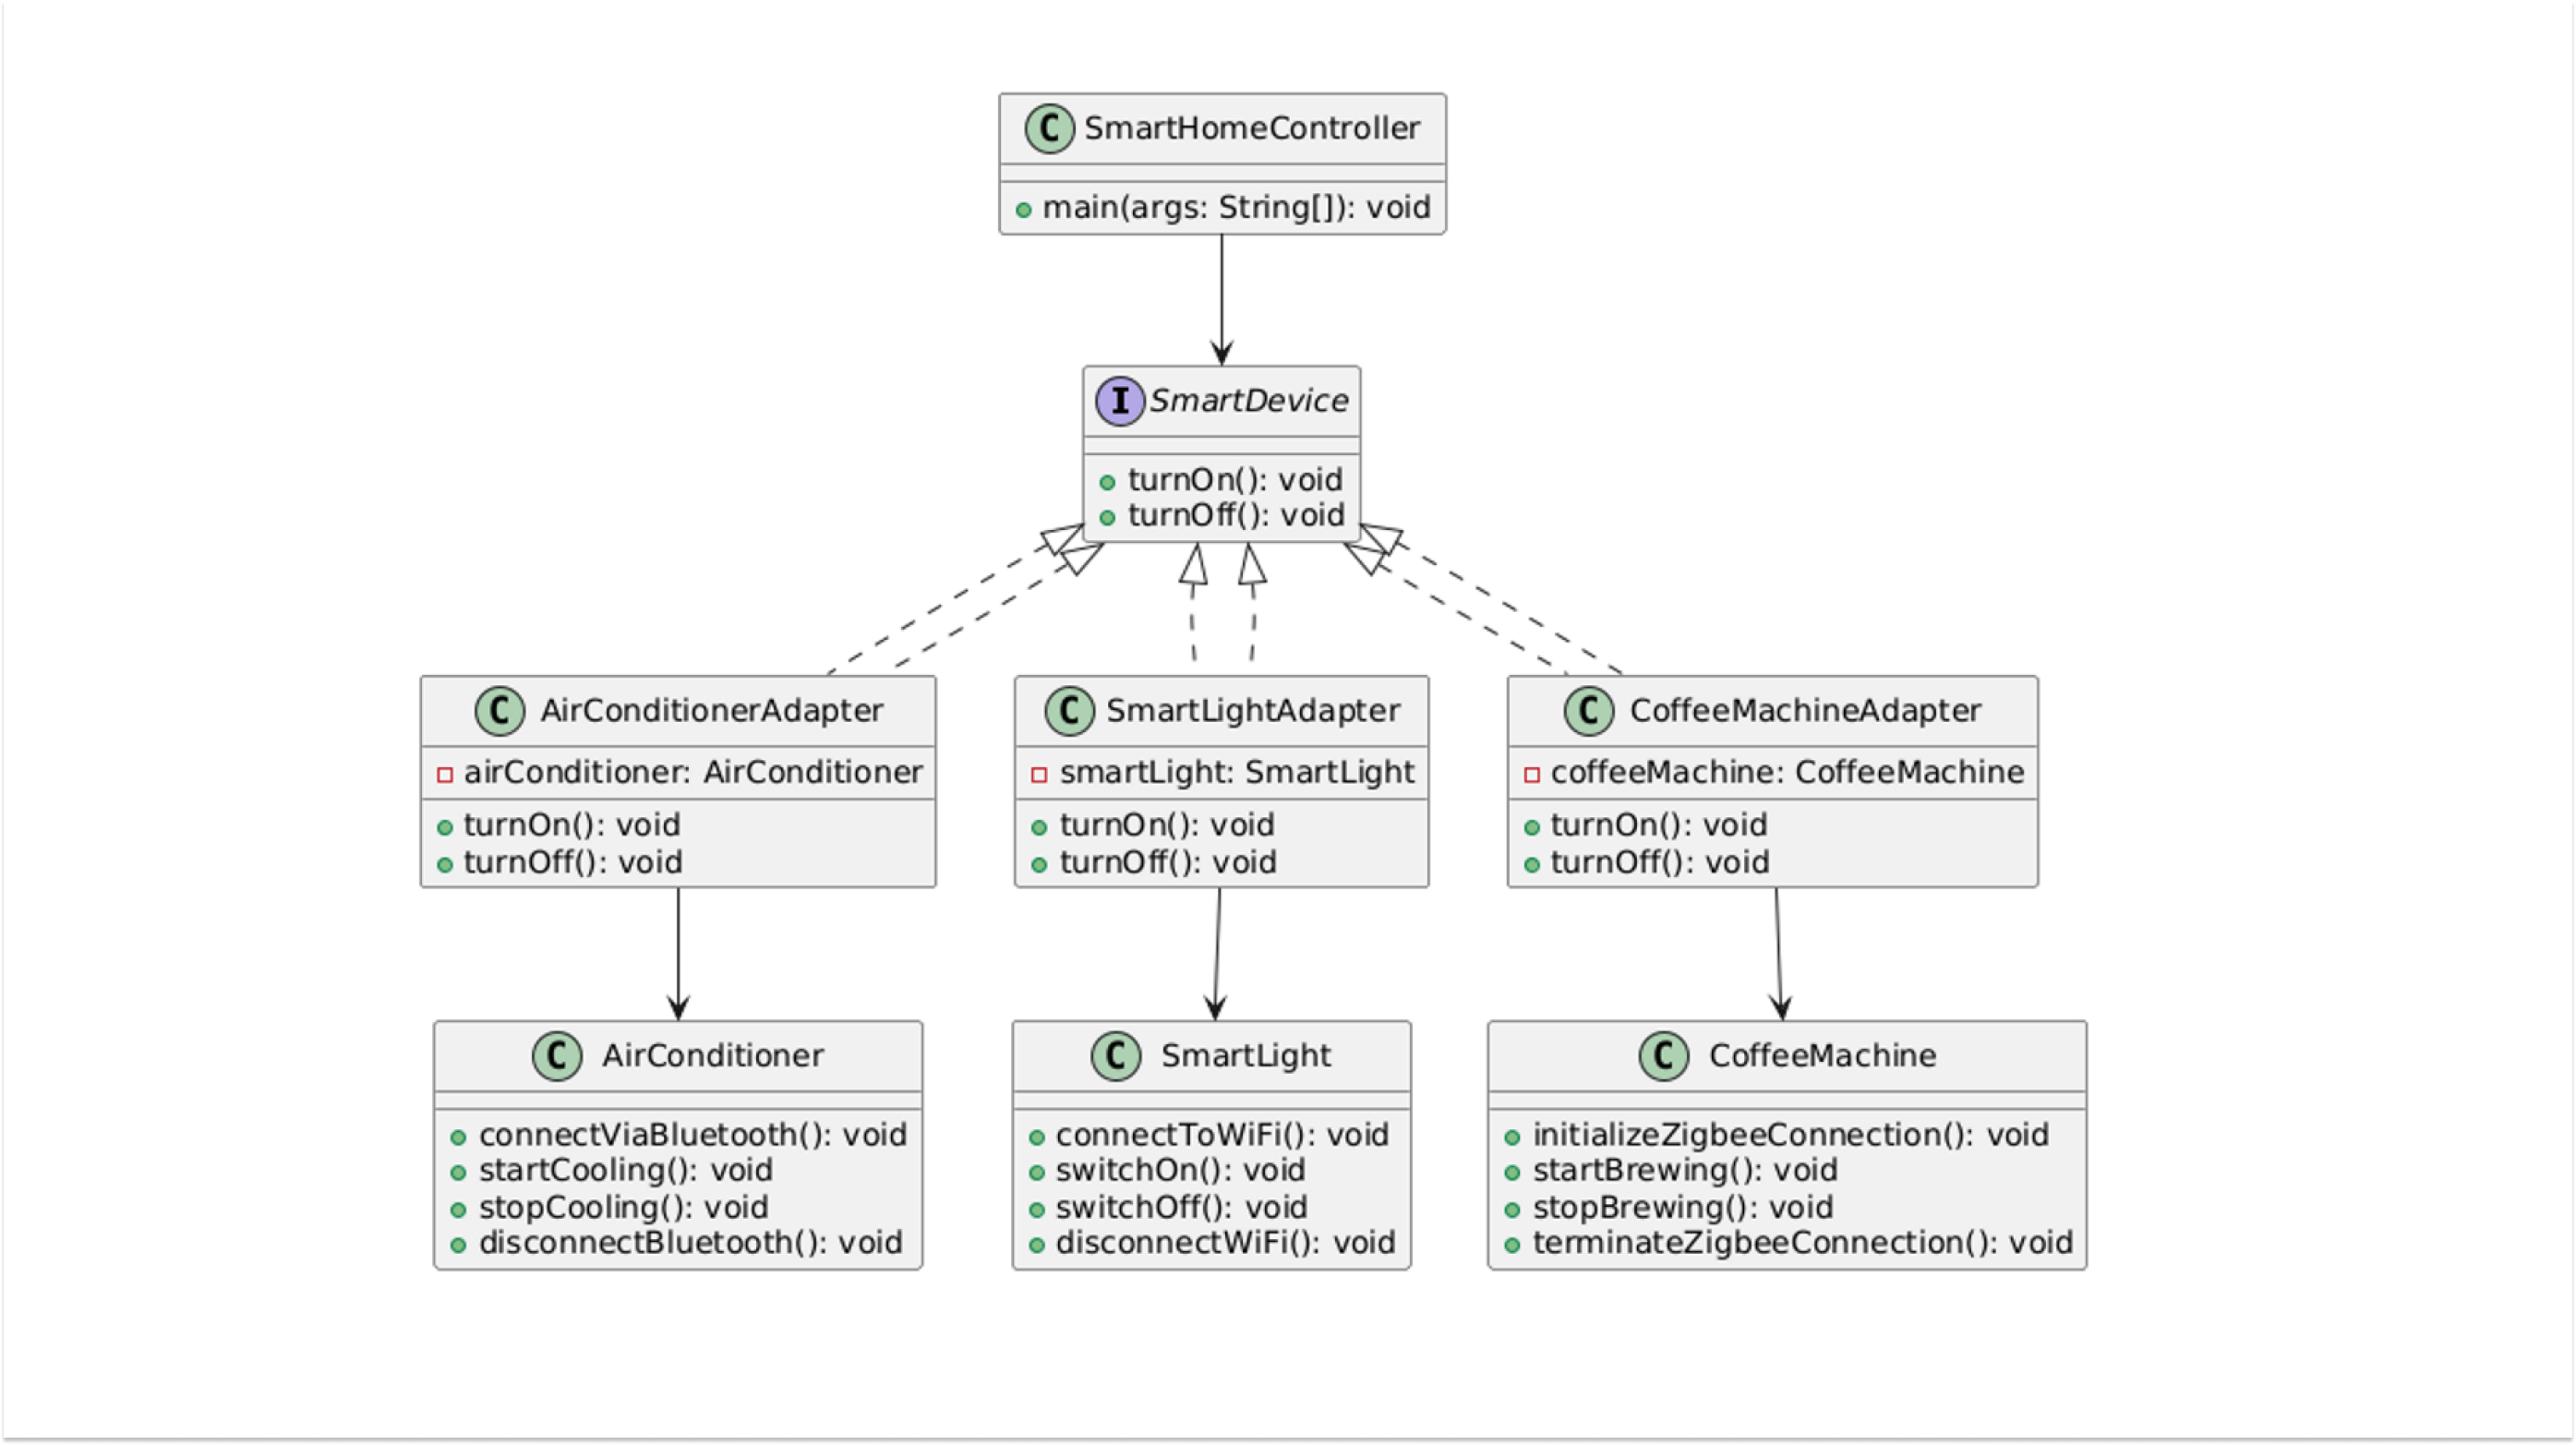

### Advantages
1. Seamless intergation
2. Scalability
3. Decoupling
4. Flexibility

### Real-life use cases
1. Smart Home systems: Adapeters are used to integrate devices from varios manufactures with different communication protocols into a unified controller.
2. Payment Gateways: Adapter are used to unify APIs from different payment gateways (payPal, stripe, Razorpay), allowing a single payment interface in the application.
3. Database Drivers: Adapeter enables applications to interact with varios databases (MySQL, PostgreSQL, MongoDB) using a consistent set of commands.
4. Media Players: In multimedia applications, adapters allow a single player to support multiple file formats by transalting file-specific operations into a common interface.

# 2. Composite Design Pattern
## Problem Statement: Managing Hierarchies of Devices
- Imagine we're designing a smart home system. Our goal is to control various devices such as rooms andd individual appliances whithin a smart home.
- For example:
    - A room contains multiple devices like air conditioners, lights, and coffee machines.
    - A floor may contain multiple rooms.
    - The House may consist of multiple floors.
- We want our SmartHomeController to control devices at any level - whether it's an individual light, an entire room, or the while house.

### The problem: Managing Hierarchical Structures
1. A room contains multiple devices (e.g AirConditioner, SmartLight)
2. A floor may contain multiple rooms
3. A House may consist of multiple floors
- Our app needs to interact with this hierachy seamlessly. For example, turning off all devices in the house should automatically turn off devices iin every floow, room, and individual appliance.

### Solving in Traditional way

In [ ]:
class smartHomeController:
    def main(self):
        # Manually managing devices and groups
        airConditioner = AirConditioner()
        smartLight = SmartLight()
        print("Turning ON devices in Room 1...")
        airConditioner.turnOn()
        smartLight.turnOn()
        print("Turning OFF devices in Room 1...")
        airConditioner.turnOFF()
        smartLight.turnOFF()

        # Manually managing multiple rooms
        print("Runing ON devices in Floor 1...")
        airConditioner.turnOn() # Room1
        smartLight.turnOn() # Room1
        airConditioner.turnOn() # Room2
        smartLight.turnOn() # Room2
        print("Turninng OFF devices in Floor 2...")
        airConditioner.turnOff()
        smartLight.turnOff()
        airConditioner.turnOff()
        smartLight.turnOff()
        print("Turning ON all devices in the house...")
        airConditioner.turnOn()
        smartLight.turnOn()

        # Add more logic as we scale

- The smartHomeController class creates each device explicitly by calling the constructor of the respective device class. This approach works but becomes cumbersome as the hierarchy grows. Adding new devices types of changing the way devices are controlled requries modifying the existing code, leading to tightly coupled and error-prone code.

### Chanllenge: How can we manage complex Hierachies efficiently?
1. What happends when add a new type of component? For example, a nee Garage or Garden that also contains devices.
2. What if the hierarchy changes? For instance, a new concept like a Zone is introduced, which groups rooms.

### Ugly Code: when we realize the code needs restructing
- The logic for managing the device becomes complex:
    - User input: The use decides which level to control (room, floor, or house)
    - Nested Hierarchies: Each room contains multiple devices, and each floor contains multiple rooms.
    - Dynamic Changes: Rooms, floor, or devices may be added or removed dynamically. If we manage the hierarchy manually, the code quickly becomes tightly coupled and error-prone
- Why this code problematic:
    - Hardcoding logic: Each level (device, room, floor, house) is managed manually, duplicating logic and making the code difficult to maintain.
    - Fragility: Adding new components (eg., a Garage or Garden) or modifying existing ones requires changing the code in multiple places.
    - Tightly Coupling: The controller is tightly coupled to specific devices, making the code less resuable and harder to extend.
    - Scalinng issues: Managing a real-world hierarchy with hundreds or dozens of rooms would make the code unmanageable.

### Savior: Composite Design Patter
- The composite design pattern is specifically designed to handle hierarchies. It allows us to treat individual objects and groups of objects (composites) uniformly.
- In our smart home system, the pattern enables us to control individual devices, rooms, floors, and even the entire house seamlessly through a single interface.
- The composite pattern achieves this by defining a common interface for both individual objects and composites (groups). Each composite can hold child components (which could be either individual objects or other composites), forming a tree structure.
- For our smart home system:
    1. Individual Devices (e.g., AirConditioner, SmartLight) implement the common interface.
    2. Groups of Devices (e.g., Room, Floor, House) implement the same interface and delegate actions to their children.

In [4]:
from abc import ABC, abstractmethod

# common Interface
class SmartComponent:
    @abstractmethod
    def turnOn(self):
        pass

    @abstractmethod
    def turnOff(self):
        pass

# Concrete Classes for Individual Devices
class AirConditioner(SmartComponent):
    def turnOn(self):
        print("Air Conditioner is now ON.")

    def turnOff(self):
        print("Air Conditioner is now OFF.")

class SmartLight(SmartComponent):
    def turnOn(self):
        print("Smart Light is now ON.")

    def turnOff(self):
        print("Smart Light is now OFF.")

# Composite classes for groups of components (Rooms, Floor, House)
class CompositeSmartComponent(SmartComponent):

    def __init__(self):
        self.components = []
    
    def addComponent(self, component: SmartComponent):
        self.components.append(component)

    def removeComponent(self, component: SmartComponent):
        self.components.remove(component)

    def turnOn(self):
        for component in self.components:
            component.turnOn()

    def turnOff(self):
        for component in self.components:
            component.turnOff()

# Build the Hierarchy and use
class SmartHomeController:
    def main(self):
        # Create individual devices
        airconditioner = AirConditioner()
        smartLight = SmartLight()

        # Create a room and add devices
        room1 = CompositeSmartComponent()
        room1.addComponent(airconditioner)
        room1.addComponent(smartLight)

        # Add more rooms for demonstration
        room2 = CompositeSmartComponent()
        room2.addComponent(AirConditioner())
        room2.addComponent(SmartLight())

        # Create a floor and add rooms
        floor = CompositeSmartComponent()
        floor.addComponent(room1)
        floor.addComponent(room2)

        # Create the house and floors
        house = CompositeSmartComponent()
        house.addComponent(floor)

        # Control the entire house
        print("Turning ON all devices in the house.")
        house.turnOn()
        print("Turning OFF all devices in the house")
        house.turnOff()

        # Control a single floor
        print("Turning ON all devices on the first floor")
        floor.turnOn()
        print("Turning OFF all devices on the first floor")
        floor.turnOff()

        # control a single room
        print("Turning ON all devices in Room 1")
        room1.turnOn()
        print("Turning OFF all devices in Room 2")
        room1.turnOff()

SmartHomeController().main()

Turning ON all devices in the house.
Air Conditioner is now ON.
Smart Light is now ON.
Air Conditioner is now ON.
Smart Light is now ON.
Turning OFF all devices in the house
Air Conditioner is now OFF.
Smart Light is now OFF.
Air Conditioner is now OFF.
Smart Light is now OFF.
Turning ON all devices on the first floor
Air Conditioner is now ON.
Smart Light is now ON.
Air Conditioner is now ON.
Smart Light is now ON.
Turning OFF all devices on the first floor
Air Conditioner is now OFF.
Smart Light is now OFF.
Air Conditioner is now OFF.
Smart Light is now OFF.
Turning ON all devices in Room 1
Air Conditioner is now ON.
Smart Light is now ON.
Turning OFF all devices in Room 2
Air Conditioner is now OFF.
Smart Light is now OFF.


- 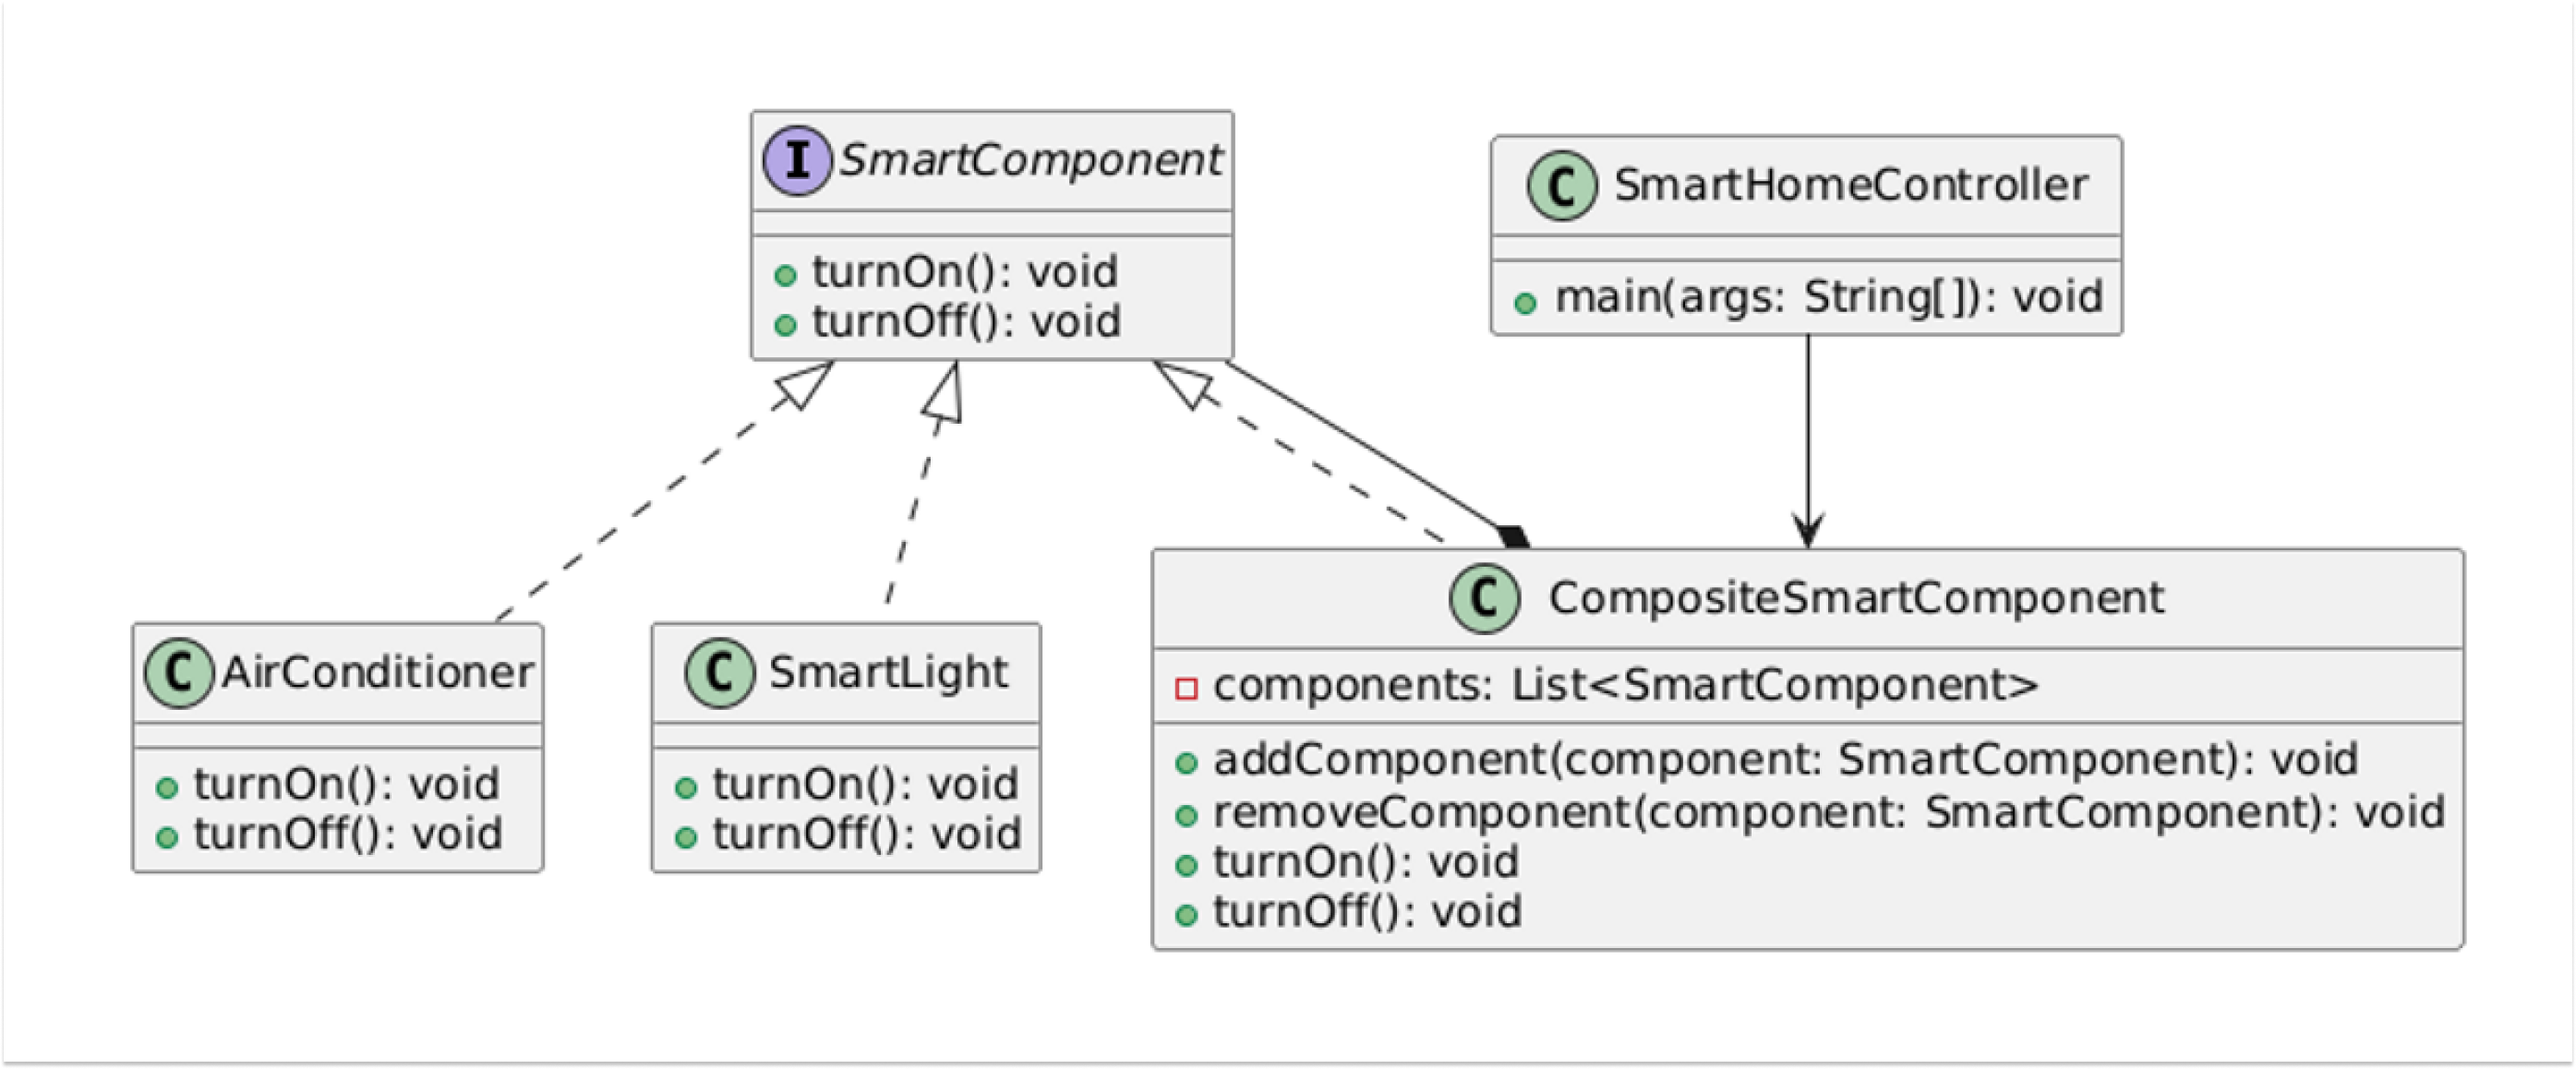

### Advantages of using the Composite Design Pattern
1. Uniformity
2. Scalability
3. Decoupling
4. Flexibility

### Use Cases
1. File Systems: Files and directories in operating system follow the composite pattern, where directories contain files or other directories.
2. Graphics Rendering: GUI frameworks use the composite pattern for rendering graphical components, where containers (panels) hold other components (eg., buttons, labels)
3. Organization Hierarchies: Companies use the composite pattern to model organizational structures, where departments contain employees or other sub-departments.

# 2. Decorator Design Pattern
- Lets us dynamically add new behavuor or responsibilites to objects without modifying their underlying code.
- Its used in
    - We want to extend the fucntionality of a class without subclassing it
    - We need to compose behaviors at runtime, in various combinations
    - We want to avoid bloated classes filled with if-else logic for optional features.

### Problem: Adding Features to a Text Renderer
- We're building a rich text rendering system like a simple word processor or a markdown preview tool. At the core of our system is a TextView component that renders plain text on screen.
- Soon, product requirements evolve:
    - We need to support bold text
    - Then italic text
    - Then underlined text
    - Then scrollable and bordered text containers
    - And possibility combinations of those (bold + italic + underlined)

#### Naive Approch: subclassing for Every Combination

In [4]:
from abc import ABC, abstractmethod
class TextView(ABC):
    @abstractmethod
    def render(self):
        pass

class BoldTextView(TextView):
    def render(self):
        print("Rendering bold text", end="")

class ItalicTextView(TextView):
    def render(self):
        print("Rendering italic text", end="")

class BoldItalicTextView(TextView):
    def render(self):
        print("Rendering bold + italic text", end="")

- Why this approach quicky falls apart
    - Class Explosion: For every new combination of features, we need to create a new subclass
    - Rigid Design: Can't dynamically change features at runtime.
    - Violates the Open/Closed principle

#### Decorator Pattern
- Allwos us to add responsibilites to object dynamically, without altering their structure or modiying their original code.
- At its core, the pattern relies on wrapping an object inside another object (decorator) that implements the same interface and adds new behavior before or after delegating to the wrapped object.
- This created a layered effect, where decorators can be stacked to apply multiple enchacements without creating a complex inheritance tree.
- 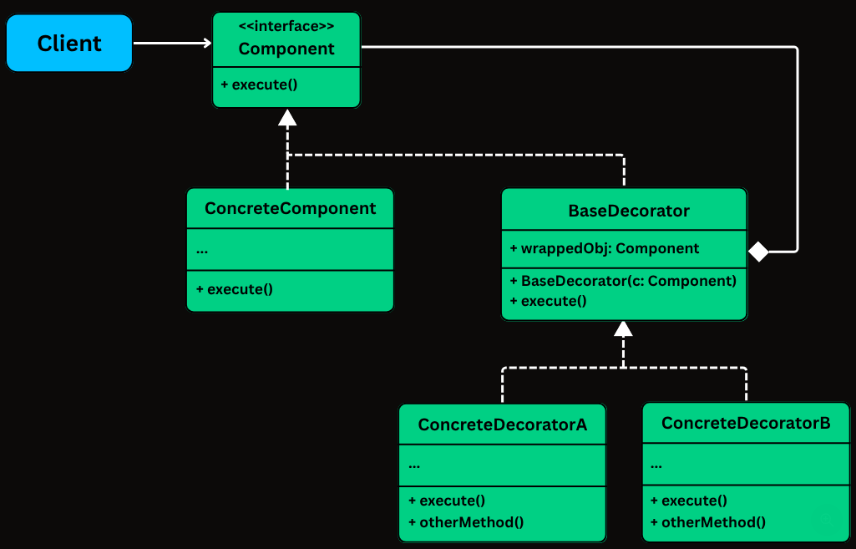

- Real Word analogy
    - Think of a plain cofferr. Now add milk. Now add sugar
    - Each addition enhances the original but doesn't change the base. The Decorator pattern works the same way - Stacking behaviors while keeping the core intact.

#### Decorator Pattern

In [19]:
from abc import ABC, abstractmethod

# Component Interface: Used by both base component and all decorators
class TextView(ABC):
    @abstractmethod
    def render(self):
        pass

# Concrete Component
class PlainTextView(TextView):
    def __init__(self, text):
        self.text = text

    def render(self):
        print(self.text, end="")

# Abstract Decorator
class TextDecorator(TextView):
    def __init__(self, inner):
        self.inner = inner

# concrete Decorators
class BoldDecorator(TextDecorator):
    def __init__(self, inner):
        super().__init__(inner)

    def render(self):
        print("<b>", end="")
        self.inner.render()
        print("</b>", end="")

class BoldDecorator(TextDecorator):
   def __init__(self, inner):
       super().__init__(inner)

   def render(self):
       print("<b>", end="")
       self.inner.render()
       print("</b>", end="")

class ItalicDecorator(TextDecorator):
   def __init__(self, inner):
       super().__init__(inner)

   def render(self):
       print("<i>", end="")
       self.inner.render()
       print("</i>", end="")

class UnderlineDecorator(TextDecorator):
   def __init__(self, inner):
       super().__init__(inner)

   def render(self):
       print("<u>", end="")
       self.inner.render()
       print("</u>", end="")

# Compose Decorators in Client
class TextRendererApp:
    @staticmethod
    def main():
        text = PlainTextView("Hello, World!")

        print("Plain: ", end="")
        text.render()

        print("Bold: ", end="")
        bold_text = BoldDecorator(text)
        bold_text.render()
        print()

        print("Italic + Underline: ", end="")
        italic_underline = UnderlineDecorator(ItalicDecorator(text))
        italic_underline.render()
        print()

        print("Bold + Italic + Underline: ", end="")
        all_styles = UnderlineDecorator(ItalicDecorator(BoldDecorator(text)))
        all_styles.render()
        print()

if __name__ == "__main__":
   TextRendererApp.main()

Plain: Hello, World!Bold: <b>Hello, World!</b>
Italic + Underline: <u><i>Hello, World!</i></u>
Bold + Italic + Underline: <u><i><b>Hello, World!</b></i></u>


## Problem Statement: Extending Functionality without modifying the core code
- Imagine we're desigining a coffee shop ordering system. The system needs to manage various coffee orders and their customizations. Customers can start with a basic coffee (Expresso, Cappuccino) and then add multiple customizations like milk, sugar, cream or flavors (vanilla, hazelnut)
- The problem: Each coffee type and customization combination would require a new class if we follow a traditional inheritance-based approach. For example, we'd need separate classes for 'ExpressoWithMilk', 'CappuccinoWithVanilla', or 'LatteWithMilkAndSugar'. This quickly becomes unmanageable as the number of combinations grows.
- The Challenge: How we can dynamically add new functionalities (customizations) to objects without altering their code or creating a complex class hierarchy?

### Solving it in Traditional approach

In [1]:
class CoffeeShop:
    def main(self):
        coffeOrder = input("Enter our coffee order:")
        if coffeOrder == 'Espresso with milk and sugar':
            print("Preparing Espresso with Milk and Sugar...")
        elif coffeOrder == 'Cappuccino with Vanilla':
            print("Preparing cappuccino with vanilla...")
        else:
            print('Order not recognized.')

### challenge: Avoiding an Explosion of Classes
- An interviewer might ask:
    - What if the coffee shop introduces a new base coffee type? Do we have to rewrite or create new combinations for every customization?
    - How can we ensure that the system is flexible enough to handle any number or type of customizations, applied in any order?
    - How can we make the code resuable and maintainable without duplciating logic?

### Ugly code

In [2]:
class CoffeeShop:
    def main(self):
        coffeOrder = input("Enter our coffee order:")
        if coffeOrder == 'Espresso with milk and sugar':
            print("Preparing Espresso with Milk and Sugar...")
        elif coffeOrder == 'Cappuccino with Vanilla':
            print("Preparing cappuccino with vanilla...")
        elif coffeOrder == 'Latte with Caramel':
            print("Preparing Latte with Caramel...")
        elif coffeOrder == 'Mocha with whipped cream':
            print("Preparing Mocha with whipped cream...")
        elif coffeOrder == 'Black coffee with Honey':
            print("Preparing Black coffee with Honey...")
        else:
            print('Order not recognized.')

### Decorator Design Pattern
- The Decorator is designed to address this problem by dynmaically adding new functionalities to objects without modifying their code. It allows us to wrap objects in layers of functionality, creating flexible and extensible systems.
- How the Decorator pattern works:
    1. Defining a common interface for the base object and its decorators.
    2. Using decorators to warp base objects, adding new behaviors while preserving the original object's interface.
    3. Allowing multiple decorators to be stacked dynamically.

In [6]:
from abc import ABC, abstractmethod

# Common interface
class Coffee:
    @abstractmethod
    def getDescription(self):
        pass

    @abstractmethod
    def getCost(self):
        pass

# Concrete Classes for Base Coffee types

class Expresso(Coffee):
    def getDescription(self):
        return 'Expresso'

    def getCost(self):
        return 2.00

class Cappuccino(Coffee):
    def getDescription(self):
        return 'Cappuccino'

    def getCost(self):
        return 3.00

# Abstract Decorator classes
class CoffeeDecorator(Coffee):
    def __init__(self, coffee: Coffee):
        self.coffee = coffee

    def getDescription(self):
        return self.coffee.getDescription()

    def getCost(self):
        return self.coffee.getCost()

# Concreate Decorators
class MilkDecorator(CoffeeDecorator):
    def __init__(self, coffee: Coffee):
        super().__init__(coffee)

    def getDescription(self):
        return self.coffee.getDescription() + ', Milk'

    def getCost(self):
        return self.coffee.getCost() + 0.50

class SugarDecorator(CoffeeDecorator):
    def __init__(self, coffee: Coffee):
        super().__init__(coffee)

    def getDescription(self):
        return self.coffee.getDescription() + ', Sugar'

    def getCost(self):
        return self.coffee.getCost() + 0.25

class VanillaDecorator(CoffeeDecorator):
    def __init__(self, coffee: Coffee):
        super().__init__(coffee)

    def getDescription(self):
        return self.coffee.getDescription() + ', Vanilla'

    def getCost(self):
        return self.coffee.getCost() + 0.75

class CoffeeShop:
    def main(self):
        coffee = Expresso()
        coffee = MilkDecorator(coffee)
        coffee = SugarDecorator(coffee)

        print(f'Order: {coffee.getDescription()}')
        print(f'Total Cost: {coffee.getCost()}')

        coffee2 = Cappuccino()
        coffee2 = VanillaDecorator(coffee2)
        print(f'Order: {coffee2.getDescription()}')
        print(f'Total Cost: {coffee2.getCost()}')


CoffeeShop().main()

Order: Expresso, Milk, Sugar
Total Cost: 2.75
Order: Cappuccino, Vanilla
Total Cost: 3.75


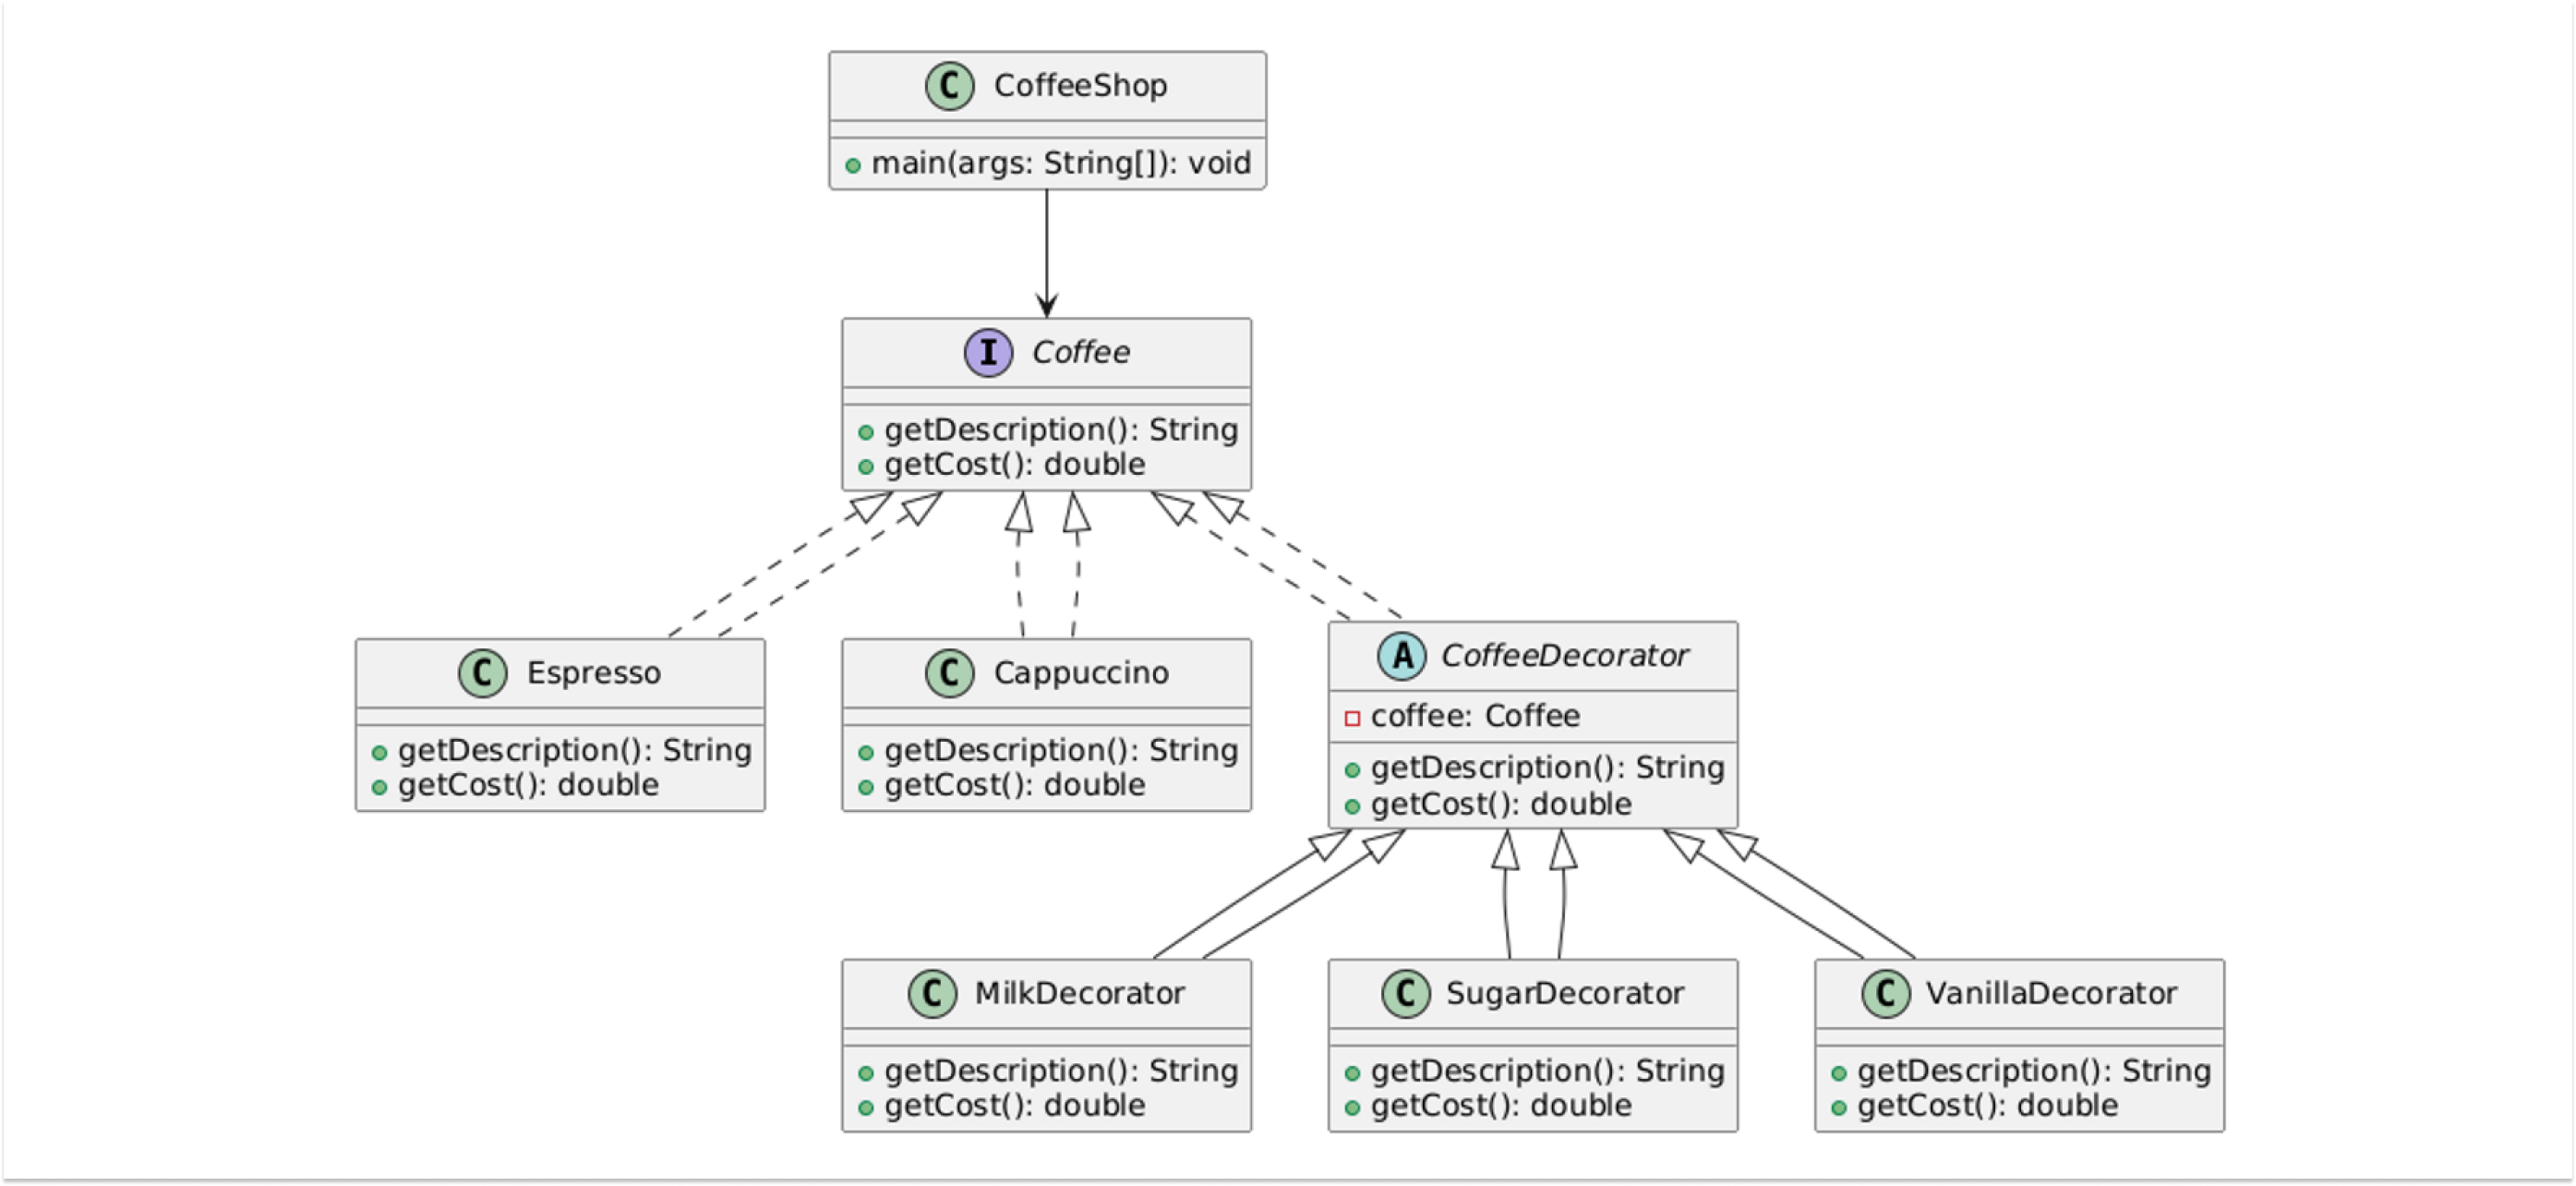

### Advantages:
1. Extensibility
2. Flexibility
3. Reusability
4. Open/Closed principles

### Use Cases
1. Coffee Shop systems: The pattern is used to manage dynamic customization of coffee order.
2. GUI Frameworks: Decorators are used to add functionalities like borders, shadows, or scrollbars to graphical components.
3. Logging Frameworks: The pattern is used to dynamically add logging, authentication, or security layers to a system.
4. File I/O strems: Java's I/O streams use decorators to add functionalitie slike buffering, compression, or encryption to file streams.

# 3. Facade Design Pattern
- 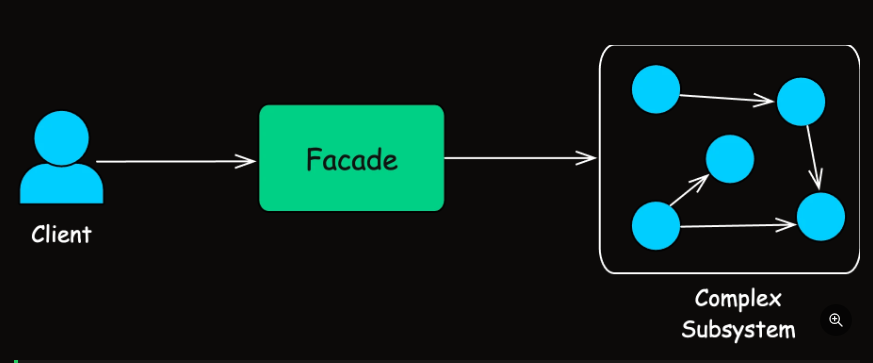
- Provides a unified, simplified interface to a complex subsystem making it easier for clients to interact with multiple components without getting overwhelmed by their intricacies.
- It's useful in
    - Our system contains many interdependent classes or low-level APIs
    - The client doen't need to know how those parts work internally
    - We want to reduce the learning cure or coupling b/w clients and complext systems
- When building applications, we often need to interact with multiple components to achive a single task.
- 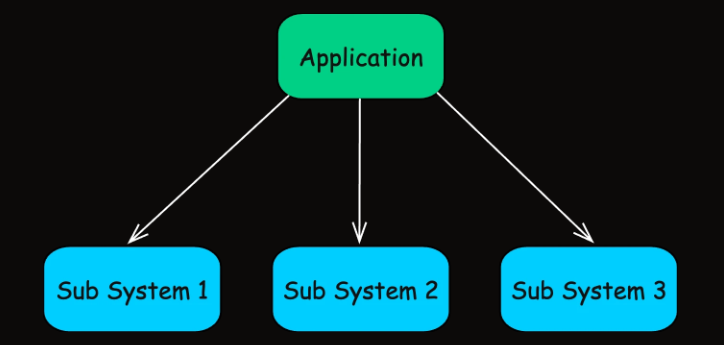
- For example, deploying a new version of our app might require calls to a build system, a container service, a monitoring tool, and a notification system - all in a specific sequence. We could write this logic in every client class, but it would become error-prone, repetitive.
- The Facade Pattern solves this by introducing a single entry point - a facade - that wraps the complext interactions behind a clean and easy-to-use interface.
- 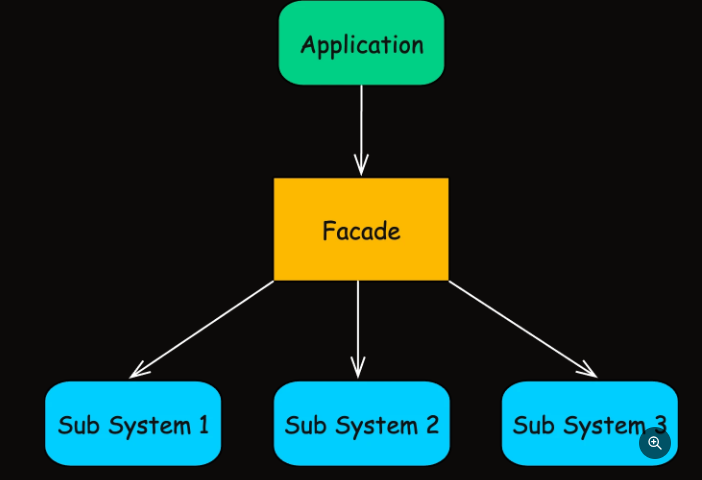

### Problem: Deployment Complexity
- We're building a deployment automation tool for our development team.
- A typical deployment workflow
    1. Pull the latest code from a Git repository
    2. Build the project using a tool like Maven or Gradle
    3. Run automated tests (unit, integration, maybe end-to-end)
    4. Deploy the build to a production environment

In [7]:
import time
import sys

# Version Control System: Fectching the lates code
class VersionControlSystem:
    def pull_latest_changes(self, branch):
        print(f"VCS: Pulling latest changes from '{branch}'")
        self._simulate_delay()
        print("VCS: Pull Complete.")

    def _simulate_delay(self):
        time.sleep(1)


# Build System: CReates an artifcat (like a .jar) and returns its location
class BuildSystem:
    def compile_project(self):
        print("BuildSystem: Compiling project.....")
        self._simulate_delay(2)
        print("BuildSystem: Build successful.")
        return True

    def get_artifact_path(self):
        path = "target/myapplication-1.0.jar"
        print(f"BuildSystem: Artifact located at {path}")
        return path

    def  _simulate_delay(self, seconds):
        time.sleep(seconds)


# Testing Framework: Excutes unit and integration tests
class TestingFramework:
    def run_unit_tests(self):
        print("Testing: Running unit tests...")
        self._simulate_delay(1.5)
        print("Testing: Unit tests passed.")
        return True

    def run_integration_tests(self):
        print("Testing: Running integration tests....")
        self._simulate_delay(3)
        print("Testing: Integration tests passed.")
        return True

    def _simulate_delay(self, seconds):
        time.sleep(seconds)

# Deployment Target: Handles artifact delivery to the server and version activation
class DeploymentTarget:
    def transfer_artifact(self, artifact_path, server):
        print(f"Deployment: Transferring {artifact_path} to {server}")
        self._simulate_delay(1.5)
        print(f"Deployment: Transfer complete.")

    def activate_new_version(self, server):
        print(f"Deployment: Activating new version on {server}...")
        self._simulate_delay(0.5)
        print(f"Deployment: Now live on {server}!")

    def _simulate_delay(self, seconds):
        time.sleep(seconds)

# Orchestrator: To coordinate everything. Defines the exact sequence of operations to perform a deployment
class DeploymentOrchestrator:
    def __init__(self):
        self.vcs = VersionControlSystem()
        self.build_system = BuildSystem()
        self.test_framework = TestingFramework()
        self.deploy_target = DeploymentTarget()

    def deploy_application(self, branch, prod_server):
        print(f"\n[Orchestrator] Starting deployment for branch: {branch}")
        
        self.vcs.pull_latest_changes(branch)

        if not self.build_system.compile_project():
           print("Build failed. Deployment aborted.", file=sys.stderr)
           return False

        artifact = self.build_system.get_artifact_path()

        if not self.test_framework.run_unit_tests() or not self.test_framework.run_integration_tests():
            print("Tests failed. Deployment aborted.", file=sys.stderr)
            return Fals

        self.deploy_target.transfer_artifact(artifact, prod_server)
        self.deploy_target.activate_new_version(prod_server)

        print("[Orchestrator] Deployment successful!")
        return True


class DeploymentAppDirect:
   @staticmethod
   def main():
       orchestrator = DeploymentOrchestrator()
       orchestrator.deploy_application("main", "prod.server.example.com")

       print("\n--- Attempting another deployment (e.g., for a feature branch to staging) ---")

if __name__ == "__main__":
    DeploymentAppDirect().main()


[Orchestrator] Starting deployment for branch: main
VCS: Pulling latest changes from 'main'
VCS: Pull Complete.
BuildSystem: Compiling project.....
BuildSystem: Build successful.
BuildSystem: Artifact located at target/myapplication-1.0.jar
Testing: Running unit tests...
Testing: Unit tests passed.
Testing: Running integration tests....
Testing: Integration tests passed.
Deployment: Transferring target/myapplication-1.0.jar to prod.server.example.com
Deployment: Transfer complete.
Deployment: Activating new version on prod.server.example.com...
Deployment: Now live on prod.server.example.com!
[Orchestrator] Deployment successful!

--- Attempting another deployment (e.g., for a feature branch to staging) ---


- While the orchestration logic works, it leads to several major as our system grows:
    1. High Client Complexity
    2. Tigh coupling between subsystems.
    3. Poor maintainability
    4. Scattered workflow logic

### Facade 
- Introduces a high-level interface that hides the complexitites of one or more subsystems and exposes only the functionality needed by the client.
- 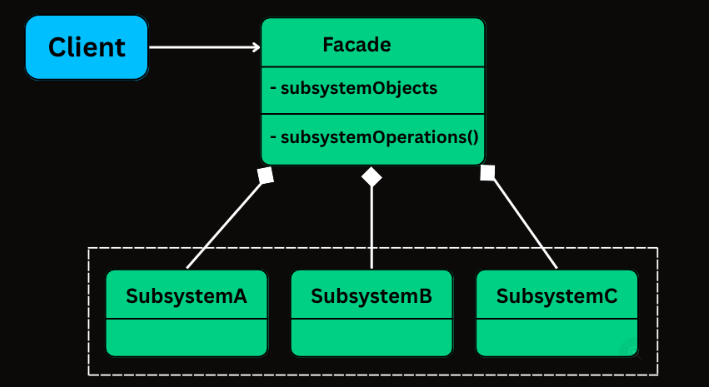

In [8]:
import time
import sys

# Version Control System: Fectching the lates code
class VersionControlSystem:
    def pull_latest_changes(self, branch):
        print(f"VCS: Pulling latest changes from '{branch}'")
        self._simulate_delay()
        print("VCS: Pull Complete.")

    def _simulate_delay(self):
        time.sleep(1)


# Build System: CReates an artifcat (like a .jar) and returns its location
class BuildSystem:
    def compile_project(self):
        print("BuildSystem: Compiling project.....")
        self._simulate_delay(2)
        print("BuildSystem: Build successful.")
        return True

    def get_artifact_path(self):
        path = "target/myapplication-1.0.jar"
        print(f"BuildSystem: Artifact located at {path}")
        return path

    def  _simulate_delay(self, seconds):
        time.sleep(seconds)


# Testing Framework: Excutes unit and integration tests
class TestingFramework:
    def run_unit_tests(self):
        print("Testing: Running unit tests...")
        self._simulate_delay(1.5)
        print("Testing: Unit tests passed.")
        return True

    def run_integration_tests(self):
        print("Testing: Running integration tests....")
        self._simulate_delay(3)
        print("Testing: Integration tests passed.")
        return True

    def _simulate_delay(self, seconds):
        time.sleep(seconds)

# Deployment Target: Handles artifact delivery to the server and version activation
class DeploymentTarget:
    def transfer_artifact(self, artifact_path, server):
        print(f"Deployment: Transferring {artifact_path} to {server}")
        self._simulate_delay(1.5)
        print(f"Deployment: Transfer complete.")

    def activate_new_version(self, server):
        print(f"Deployment: Activating new version on {server}...")
        self._simulate_delay(0.5)
        print(f"Deployment: Now live on {server}!")

    def _simulate_delay(self, seconds):
        time.sleep(seconds)

# Orchestrator: To coordinate everything. Defines the exact sequence of operations to perform a deployment
class DeploymentOrchestrator:
    def __init__(self):
        self.vcs = VersionControlSystem()
        self.build_system = BuildSystem()
        self.test_framework = TestingFramework()
        self.deploy_target = DeploymentTarget()

    def deploy_application(self, branch, prod_server):
        print(f"\n[Orchestrator] Starting deployment for branch: {branch}")
        
        self.vcs.pull_latest_changes(branch)

        if not self.build_system.compile_project():
           print("Build failed. Deployment aborted.", file=sys.stderr)
           return False

        artifact = self.build_system.get_artifact_path()

        if not self.test_framework.run_unit_tests() or not self.test_framework.run_integration_tests():
            print("Tests failed. Deployment aborted.", file=sys.stderr)
            return Fals

        self.deploy_target.transfer_artifact(artifact, prod_server)
        self.deploy_target.activate_new_version(prod_server)

        print("[Orchestrator] Deployment successful!")
        return True


# Facade
class DeploymentFacade:
   def __init__(self):
       self.vcs = VersionControlSystem()
       self.build_system = BuildSystem()
       self.testing_framework = TestingFramework()
       self.deployment_target = DeploymentTarget()

   def deploy_application(self, branch, server_address):
       print(f"\nFACADE: --- Initiating FULL DEPLOYMENT for branch: {branch} to {server_address} ---")
       success = True

       try:
           self.vcs.pull_latest_changes(branch)

           if not self.build_system.compile_project():
               print("FACADE: DEPLOYMENT FAILED - Build compilation failed.", file=sys.stderr)
               return False

           artifact_path = self.build_system.get_artifact_path()

           if not self.testing_framework.run_unit_tests():
               print("FACADE: DEPLOYMENT FAILED - Unit tests failed.", file=sys.stderr)
               return False

           if not self.testing_framework.run_integration_tests():
               print("FACADE: DEPLOYMENT FAILED - Integration tests failed.", file=sys.stderr)
               return False

           self.deployment_target.transfer_artifact(artifact_path, server_address)
           self.deployment_target.activate_new_version(server_address)

           print(f"FACADE: APPLICATION DEPLOYED SUCCESSFULLY to {server_address}!")
       except Exception as e:
           print(f"FACADE: DEPLOYMENT FAILED - An unexpected error occurred: {str(e)}", file=sys.stderr)
           import traceback
           traceback.print_exc()
           success = False

       return success


# Client
class DeploymentAppFacade:
   @staticmethod
   def main():
       deployment_facade = DeploymentFacade()

       # Deploy to production
       deployment_facade.deploy_application("main", "prod.server.example.com")

       # Deploy a feature branch to staging
       print("\n--- Deploying feature branch to staging ---")
       deployment_facade.deploy_application("feature/new-ui", "staging.server.example.com")

if __name__ == "__main__":
   DeploymentAppFacade.main()


FACADE: --- Initiating FULL DEPLOYMENT for branch: main to prod.server.example.com ---
VCS: Pulling latest changes from 'main'
VCS: Pull Complete.
BuildSystem: Compiling project.....
BuildSystem: Build successful.
BuildSystem: Artifact located at target/myapplication-1.0.jar
Testing: Running unit tests...
Testing: Unit tests passed.
Testing: Running integration tests....
Testing: Integration tests passed.
Deployment: Transferring target/myapplication-1.0.jar to prod.server.example.com
Deployment: Transfer complete.
Deployment: Activating new version on prod.server.example.com...
Deployment: Now live on prod.server.example.com!
FACADE: APPLICATION DEPLOYED SUCCESSFULLY to prod.server.example.com!

--- Deploying feature branch to staging ---

FACADE: --- Initiating FULL DEPLOYMENT for branch: feature/new-ui to staging.server.example.com ---
VCS: Pulling latest changes from 'feature/new-ui'
VCS: Pull Complete.
BuildSystem: Compiling project.....
BuildSystem: Build successful.
BuildSystem

## Problem Statment: Simpliying Complexity with a Unified Interface
- Imagine we're desigining a multimedia application. The app needs to provide users with an easy way to perform actions like playing music, watching videos, or viewing images. However, each type of media has its own complex subsystem:
    - Music Player: Requires intializing audio drivers, decoding audio formats, and managing playback.
    - Video Player: Involves setting up rendering engines, handling codecs, and managing screen resolutions.
    - Image Viewers: Needs to load image files, apply scaling, and render them on the screen.
- The Problem: Users want a simple, intuitive interface with the application, but the underlying subsystems are complex and diverse. Exposing these subsystems directly to suers would overwhelm them and increase the likelihood of errors.

In [ ]:
class MultimediaApp:
    def main(self):
        action = input("Choose an action: playMusic, playVideo, viewImage")
        if action == 'playMusic':
            musicPlayer = MusicPlayer()
            musicPlayer.initializeAudioDrivers()
            musicPlayer.decodeAudio()
            musicPlayer.startPlayback()
        elif action == 'playVideo':
            videoPlayer = VideoPlayer()
            videoPlayer.setupRenderingEngine()
            videoPlayer.loadVideoFile()
            videoPlayer.playVideo()
        elif action == 'viewImage':
            imageViewer = ImageViewer()
            imageViewer.loadImageFile()
            imageViewer.applyScaling(
            imageViewer.displayImage()
        else:
            print("Invalid Action!")

- It exposes the complexity of each subsystem. The MultimediaApp class is tighlty coupled to the specific implementations of the MusicPlayer, VideoPlayer, and ImageViewer. The tight coupling means that any changes to the implementation details of these classes will directly impact the MultimediaApp class, making the code less flexible and harder to maintain. Adding new media types or changing existing implementations would requrie significant modifications to the MultimediaApp class, leading to a higher risk of introducing bugs and increasing the overall complexity of the system.

### challenge: Handling Complexity without Simplicity
- An interview might ask:
    - What if we need to add support for new media types in the future, such as eBooks or podcasts?
    - How would we handle a change in subsystem implementation, such as the VideoPlayer switching to a new rendering engine.
    - What if we wanted to test or replace a specific subsystem without affecting the rest of the application?
    - How can we ensure that client interacts with theses subsystems seamlessly without getting entangled in their complexity.

In [ ]:
class MultimediaApp:
    def main(self):
        action = input("Choose an action: playMusic, playVideo, viewImage,"+"readEbooks, playPodcast")
        if action == 'playMusic':
            musicPlayer = MusicPlayer()
            musicPlayer.initializeAudioDrivers()
            musicPlayer.decodeAudio()
            musicPlayer.startPlayback()
        elif action == 'playVideo':
            videoPlayer = VideoPlayer()
            videoPlayer.setupRenderingEngine()
            videoPlayer.loadVideoFile()
            videoPlayer.playVideo()
        elif action == 'viewImage':
            imageViewer = ImageViewer()
            imageViewer.loadImageFile()
            imageViewer.applyScaling()
            imageViewer.displayImage()
        elif action == 'readEbooks':
            ebookReader = EbookReader()
            ebookReader.loadEbookFile()
            ebookReader.displayEbook()
        elif action == 'playPodcast':
            podcastPlayer = PodcastPlayer()
            podcastPlayer.loadPodcast()
            podcastPlayer.playPodcast()
        else:
            print("Invalid Action!")

### Why is this code problematic
1. Tight Coupling: The MultiMediaApp class is directly tied to the implementations of MusicPlayer, VideoPlayer, and ImageViewer. Adding a new media type requires modifying the client code.
2. Poor Maintainability: Any change in subsystem behavior (VideoPlayer switching rendering engines) necessitates updates across the client.
3. Lack of Scalability: As more subsystems are added, the client becomes bloated with conditional logic.

### Facade Design Pattern
- The Facade pattern introduces a facade class that acts as a single point of access to the subsystems. The client interacts with the Facade, which delegates requests to the appropriate subsystems. This hides the complexity of the subsystems and provides a clean, simplified interface.

In [9]:
# Subsystems
class MusicPlayer:
    def intializeAudioDrivers(self):
        print("Audio drivers initialized.")

    def decodeAudio(self):
        print("Audio decoded.")

    def startPlayback(self):
        print("Music playback started.")

class VideoPlayer:
    def setupRenderingEngine(self):
        print("Rendering engine set up.")

    def loadVideoFile(self):
        print("Video file loaded.")

    def playVideo(self):
        print("Video playback started.")

class ImageViewer:
    def loadImageFile(self):
        print("Image file loaded.")

    def applyScaling(self):
        print("Image scaled.")

    def displayImage(self):
        print("Image displayed.")

# Facade class
class MediaFacade:
    def __init__(self):
        self.musicPlayer = MusicPlayer()
        self.videoPlayer = VideoPlayer()
        self.imageViewer = ImageViewer()

    def performAction(self, action: str):
        action = action.lower()
        
        match action:
            case 'playmusic':
                self.musicPlayer.intializeAudioDrivers()
                self.musicPlayer.decodeAudio()
                self.musicPlayer.startPlayback()
            case 'playvideo':
                self.videoPlayer.setupRenderingEngine()
                self.videoPlayer.loadVideoFile()
                self.videoPlayer.playVideo()
            case 'viewimage':
                self.imageViewer.loadImageFile()
                self.imageViewer.applyScaling()
                self.imageViewer.displayImage()
            case _:
                print("Invalid action!")

# Facade in the client
class MultimediaApp:
    def main(self):
        mediaFacade = MediaFacade()
        print("Welcome to multimedia app!")
        action = input("Choose an action: playmusic, playvideo, viewimage")
        mediaFacade.performAction(action)

MultimediaApp().main()

Welcome to multimedia app!


Choose an action: playmusic, playvideo, viewimage viewimage


Image file loaded.
Image scaled.
Image displayed.


- 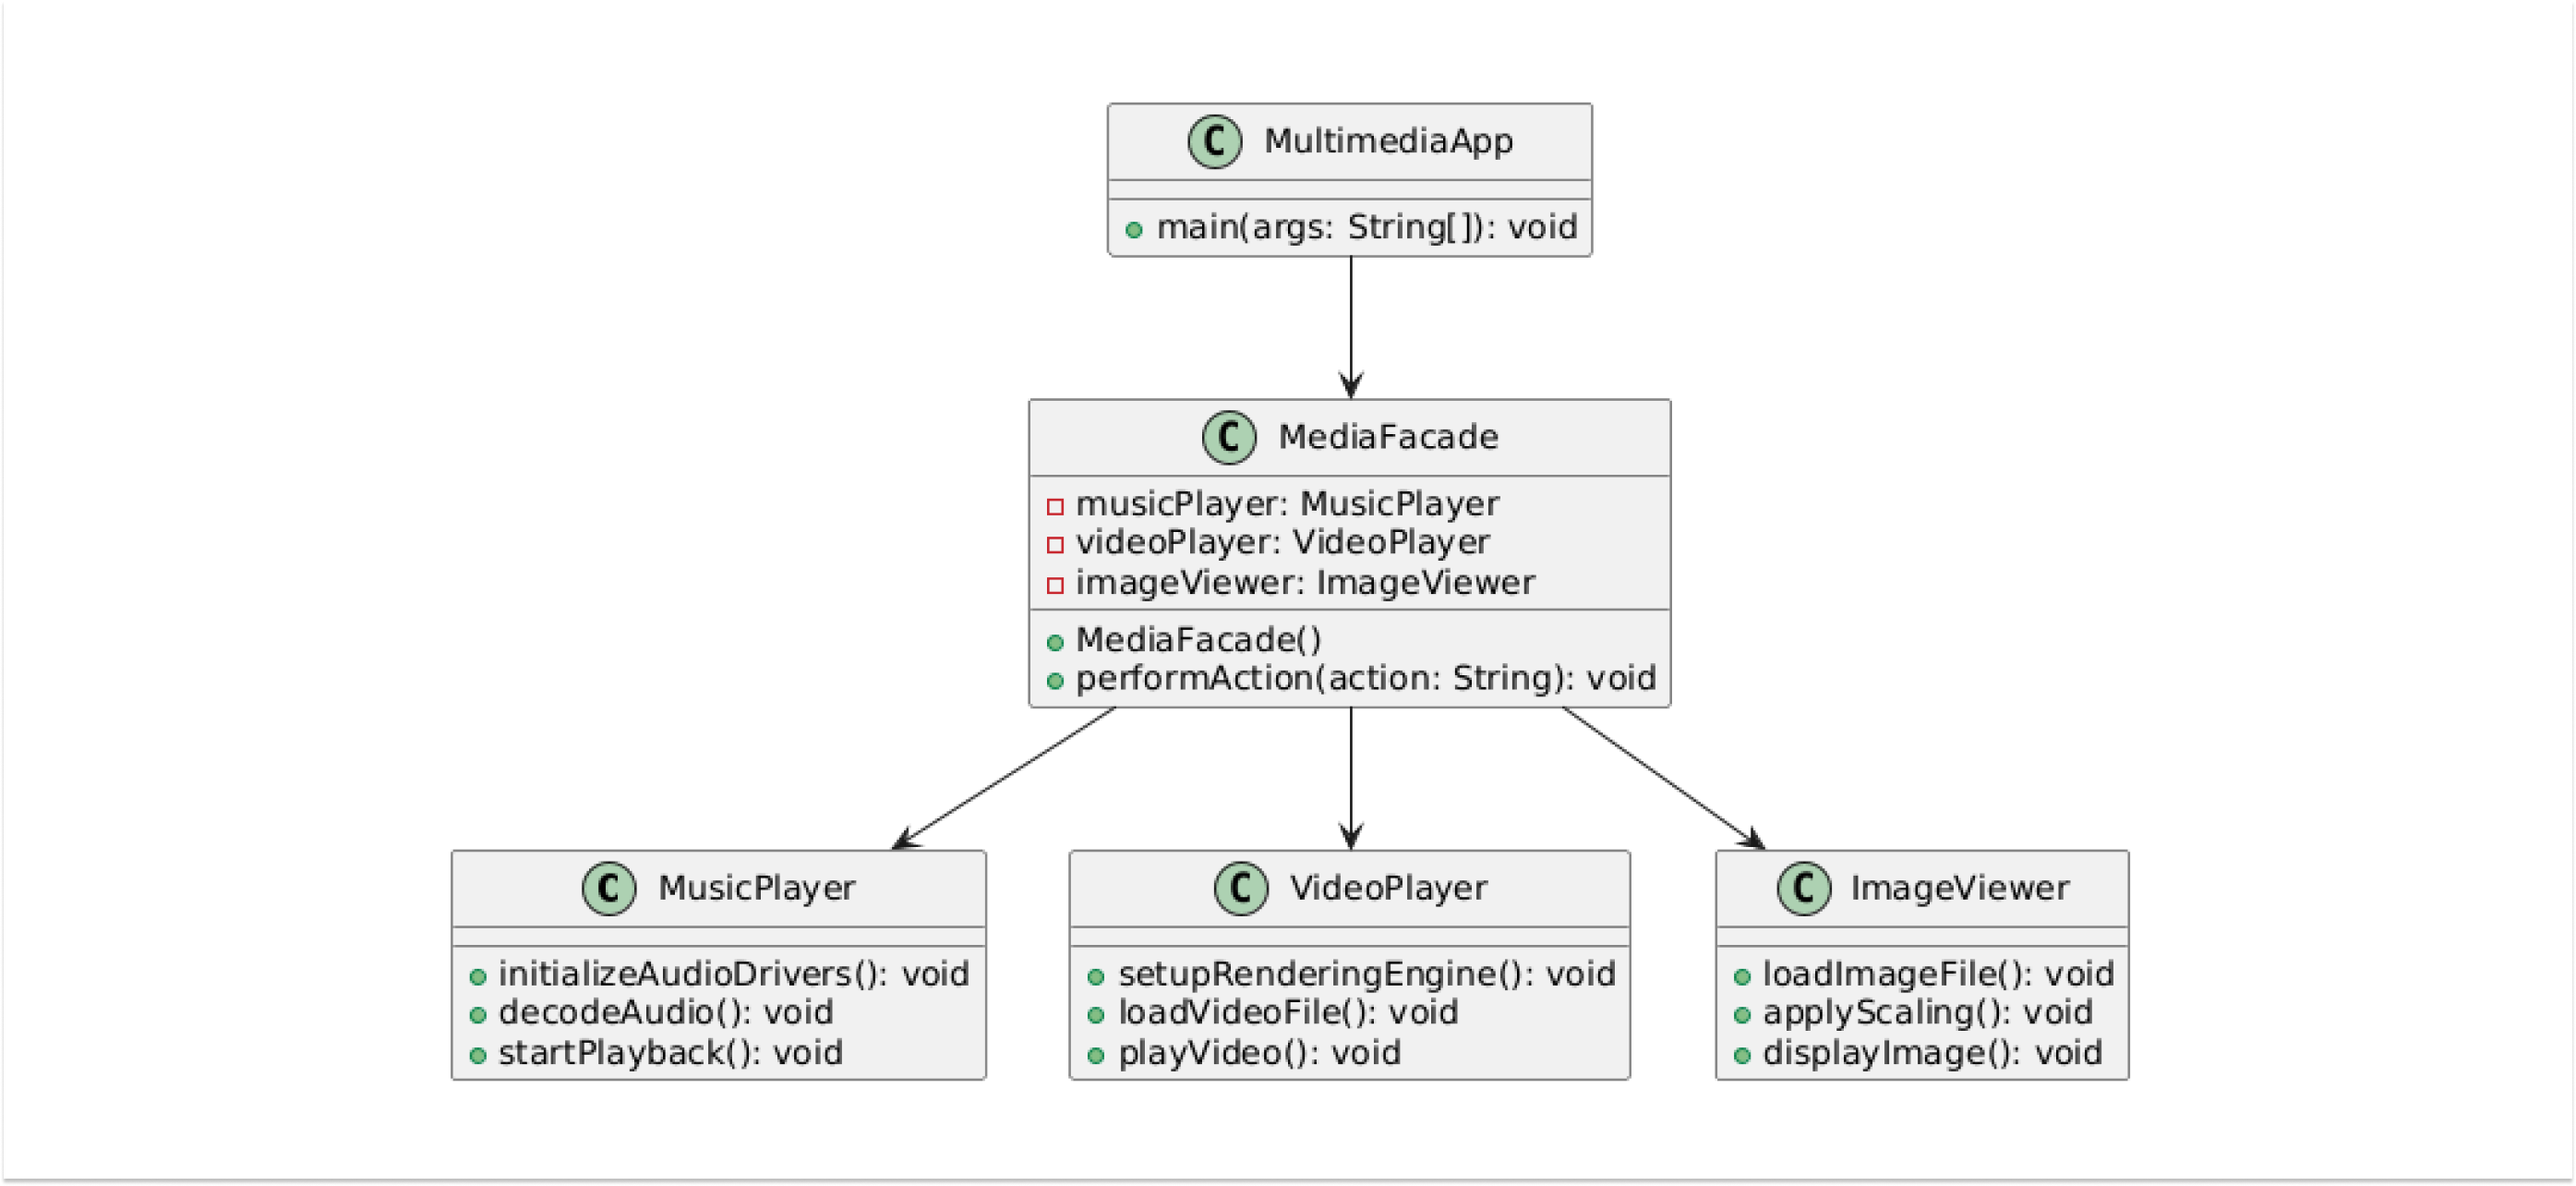

### Use cases:
1. Smart Home System: A smart home controller app uses a facade to provide a unified interface for managin devices like lights, thermostats, and security cameras.
2. Payment Gateways: Processing systems use as facade to abstract the complexities of interfacting with multiple payment providers.
3. Database Management: Applications use a facade to provide a simplified interface for interacting with database connections, queries, and trasactions.
4. Mutlimedia applications: The facade simplifies interaction with subsystems like music players, video players, and image viewers.

- The Facade design pattern simplifies complex systems by providing a unified interface that hides the intricacies of subsystems. By centralizing interaction logic, the facade patternn improves maintainability, scalability, and flexibility, making it an esssential tool for designing clean, user-friendly systems.

# 4. Proxy Design Pattern
- Provides a placeholder or surrogate for another object, allowing us to control access to it.
- In real world applications, we often work with resource-intensive, remote, or sensitive components - such as database connections, 3rd party APIs, file systems or large in memory datasets.
- 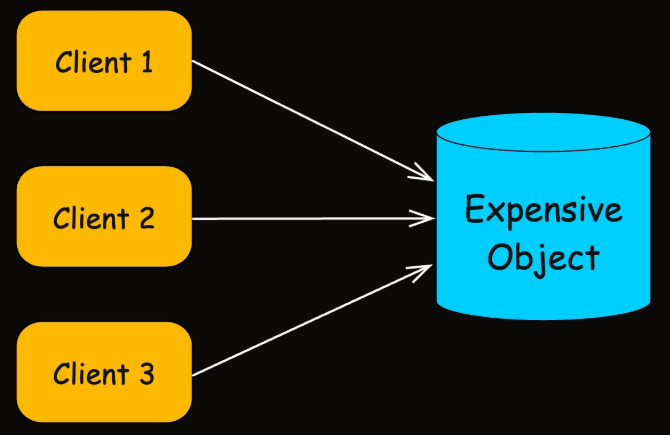
- We want to defer or control access to the actual implementation, add extra functionality (logging, authentication) without modifying exisiting code.
- A proxy sits b/w the client and the real object, intercepting calls and optionally altering the behavior.
- 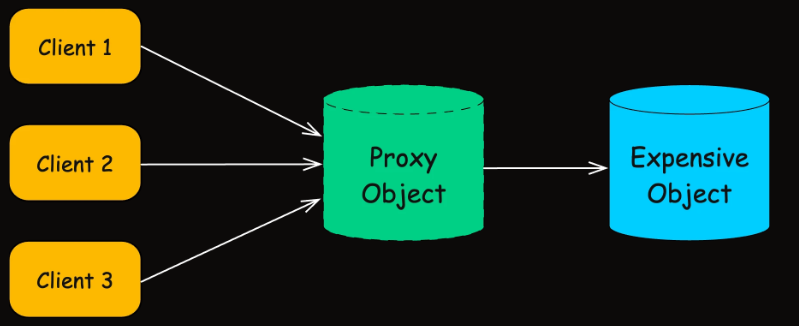

### Problem: Eager Loading
- Building an image gallery application. Users can scroll through a list of image thumbnails, and when they click on one, the full high-resolution image is displayed.

In [16]:
from abc import ABC, abstractmethod
import time

# Image Interface: To support rendering
class Image(ABC):
    @abstractmethod
    def display(self):
        pass

    @abstractmethod
    def get_file_name(self):
        pass

# High resolution image implementation
class HighResolutionImage(Image):
    def __init__(self, file_name):
        self.file_name = file_name
        self.image_data = None
        self.load_image_from_disk()

    def load_image_from_disk(self):
        print(f"Loading image: {self.file_name} from disk (Expensive Operation)...")
        try:
            time.sleep(2)
            self.image_data = bytearray(10 * 1024 * 1024)
        except KeyboardInterrupt:
            pass

        print(f"Image {self.file_name} loaded successfully.")

    def display(self):
        print(f"Displaying image: {self.file_name}")

    def get_file_name(self):
        return self.file_name

# Naive Gallery App
class ImageGalleryAppV1:
   @staticmethod
   def main():
       print("Application Started. Initializing images for gallery...")

       # Images are created eagerly – loaded even if not viewed!
       image1 = HighResolutionImage("photo1.jpg")
       image2 = HighResolutionImage("photo2.png")
       image3 = HighResolutionImage("photo3.gif")

       print("\nGallery initialized. User might view an image now.")

       # User clicks on image1
       print(f"User requests to display {image1.get_file_name()}")
       image1.display()

       # User clicks on image3
       print(f"\nUser requests to display {image3.get_file_name()}")
       image3.display()

       print("\nApplication finished.")

if __name__ == "__main__":
    ImageGalleryAppV1().main()

Application Started. Initializing images for gallery...
Loading image: photo1.jpg from disk (Expensive Operation)...
Image photo1.jpg loaded successfully.
Loading image: photo2.png from disk (Expensive Operation)...
Image photo2.png loaded successfully.
Loading image: photo3.gif from disk (Expensive Operation)...
Image photo3.gif loaded successfully.

Gallery initialized. User might view an image now.
User requests to display photo1.jpg
Displaying image: photo1.jpg

User requests to display photo3.gif
Displaying image: photo3.gif

Application finished.


- This approach
    1. Resource-intensive initialization: Loads its image data at the time of construction, even if the suer never views the image.
    2. No control over access:


#### With Proxy pattern
- Provides a stand-in or placeholder for another object to control access to it. Instead of the client interacting directly with the "real" object, it interacts with a proxy that implements the same interface.
- This allows the proxy to perform additional responsibilites - such as lazy initialization, access control, logging, or caching without changing the original class or the client code.
- 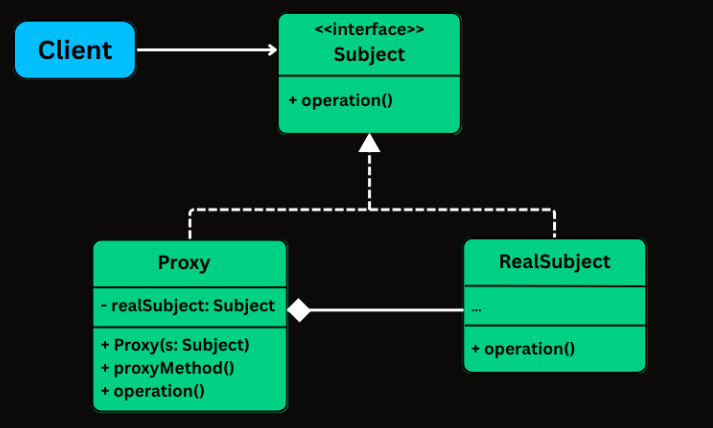

In [18]:
from abc import ABC, abstractmethod
import time

# Image Interface: To support rendering
class Image(ABC):
    @abstractmethod
    def display(self):
        pass

    @abstractmethod
    def get_file_name(self):
        pass

# High resolution image implementation
class HighResolutionImage(Image):
    def __init__(self, file_name):
        self.file_name = file_name
        self.image_data = None
        self.load_image_from_disk()

    def load_image_from_disk(self):
        print(f"Loading image: {self.file_name} from disk (Expensive Operation)...")
        try:
            time.sleep(2)
            self.image_data = bytearray(10 * 1024 * 1024)
        except KeyboardInterrupt:
            pass

        print(f"Image {self.file_name} loaded successfully.")

    def display(self):
        print(f"Displaying image: {self.file_name}")

    def get_file_name(self):
        return self.file_name

# Proxy Class
class ImageProxy(Image):
    def __init__(self, file_name):
        self.file_name = file_name
        self.real_image = None
        print(f"ImageProxy: Created for {file_name}. Real image not loaded yet.")

    def get_file_name(self):
        # Can safely return without loading the image
        return self.file_name

    def display(self):
        # Lazy initialization: Load only when display() is called
        if self.real_image is None:
            print(f"ImageProxy: display() requested for {self.file_name}. Loading high-resolution image...")
            self.real_image = HighResolutionImage(self.file_name)
        else:
            print(f"ImageProxy: Using cached high-resolution image for {self.file_name}")

        # Delegate the display call to the real image
        self.real_image.display()

# Client Code
class ImageGalleryAppV2:
   @staticmethod
   def main():
       print("Application Started. Initializing images proxies for gallery...")

       # Images are created eagerly – loaded even if not viewed!
       image1 = ImageProxy("photo1.jpg")
       image2 = ImageProxy("photo2.png")
       image3 = ImageProxy("photo3.gif")

       print("\nGallery initialized. No images actually loaded yet.")
       print(f"Image 1 Filename: {image1.get_file_name()}")  # Does not trigger image load

       # User clicks on image1
       print(f"\nUser requests to display {image1.get_file_name()}")
       image1.display()  # Lazy loading happens here

       # User clicks on image1 again
       print(f"\nUser requests to display {image1.get_file_name()} again.")
       image1.display()  # Already loaded; no loading delay

       # User clicks on image3
       print(f"\nUser requests to display {image3.get_file_name()}")
       image3.display()  # Triggers loading for image3

       print("\nApplication finished. Note: photo2.png was never loaded.")

if __name__ == "__main__":
    ImageGalleryAppV2().main()

Application Started. Initializing images proxies for gallery...
ImageProxy: Created for photo1.jpg. Real image not loaded yet.
ImageProxy: Created for photo2.png. Real image not loaded yet.
ImageProxy: Created for photo3.gif. Real image not loaded yet.

Gallery initialized. No images actually loaded yet.
Image 1 Filename: photo1.jpg

User requests to display photo1.jpg
ImageProxy: display() requested for photo1.jpg. Loading high-resolution image...
Loading image: photo1.jpg from disk (Expensive Operation)...
Image photo1.jpg loaded successfully.
Displaying image: photo1.jpg

User requests to display photo1.jpg again.
ImageProxy: Using cached high-resolution image for photo1.jpg
Displaying image: photo1.jpg

User requests to display photo3.gif
ImageProxy: display() requested for photo3.gif. Loading high-resolution image...
Loading image: photo3.gif from disk (Expensive Operation)...
Image photo3.gif loaded successfully.
Displaying image: photo3.gif

Application finished. Note: photo2.pn